In [2]:
import scanpy as sc
import scanpy.external as sce
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
from gprofiler import gprofiler

import rpy2.rinterface_lib.callbacks
import logging

from rpy2.robjects import pandas2ri
import anndata2ri

In [3]:
# ignore R warning messages
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

# Automatically convert rpy2 outputs to pandas dataframes
pandas2ri.activate()
anndata2ri.activate()
%load_ext rpy2.ipython

plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3
#sc.set_figure_params(dpi=200, dpi_save=300)
sc.logging.print_versions()

scanpy==1.4.3+116.g0075c62 anndata==0.6.22rc1 umap==0.3.9 numpy==1.16.2 scipy==1.3.0 pandas==0.24.1 scikit-learn==0.20.2 statsmodels==0.10.0rc2 python-igraph==0.7.1 louvain==0.6.1


In [7]:
#User inputs
folder = '/storage/groups/ml01/workspace/malte.luecken/2019_wurst_demuxlet/Main_study/'

adata_preproc = '/storage/groups/ml01/workspace/malte.luecken/2019_wurst_demuxlet/Main_study/processed_data/ipsc_ipd_patients_preproc.h5ad'

adata_full = '/storage/groups/ml01/workspace/malte.luecken/2019_wurst_demuxlet/Main_study/processed_data/ipsc_ipd_patients_full.h5ad'

# Read the data

In [4]:
adata = sc.read(adata_preproc)

In [5]:
adata

AnnData object with n_obs × n_vars = 30557 × 24920 
    obs: 'Demux_state', 'Donor', 'Lane', 'donor', 'log_counts', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'S_score', 'G2M_score', 'phase', 'louvain_r1', 'louvain_r0.5', 'louvain_r0.2'
    var: 'n_cells-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'n_cells-2', 'highly_variable-2', 'means-2', 'dispersions-2', 'dispersions_norm-2', 'n_cells-3', 'highly_variable-3', 'means-3', 'dispersions-3', 'dispersions_norm-3', 'n_cells-4', 'highly_variable-4', 'means-4', 'dispersions-4', 'dispersions_norm-4', 'n_cells-5', 'highly_variable-5', 'means-5', 'dispersions-5', 'dispersions_norm-5', 'n_cells-6', 'highly_variable-6', 'means-6', 'dispersions-6', 'dispersions_norm-6', 'n_cells-7', 'highly_variable-7', 'means-7', 'dispersions-7', 'dispersions_norm-7', 'n_cells-8', 'highly_variable-8', 'means-8', 'dispersions-8', 'dispersions_

# Plot clusters and metadata

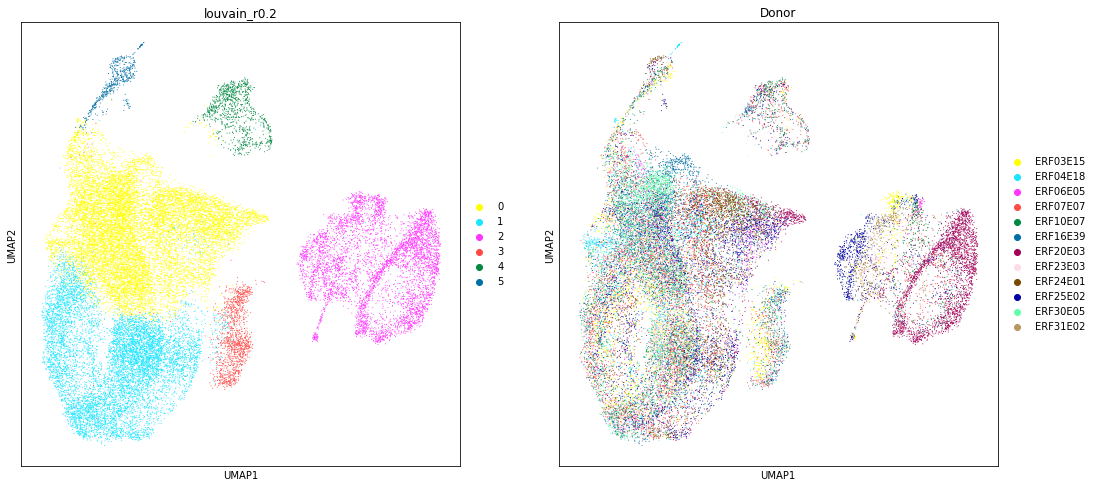

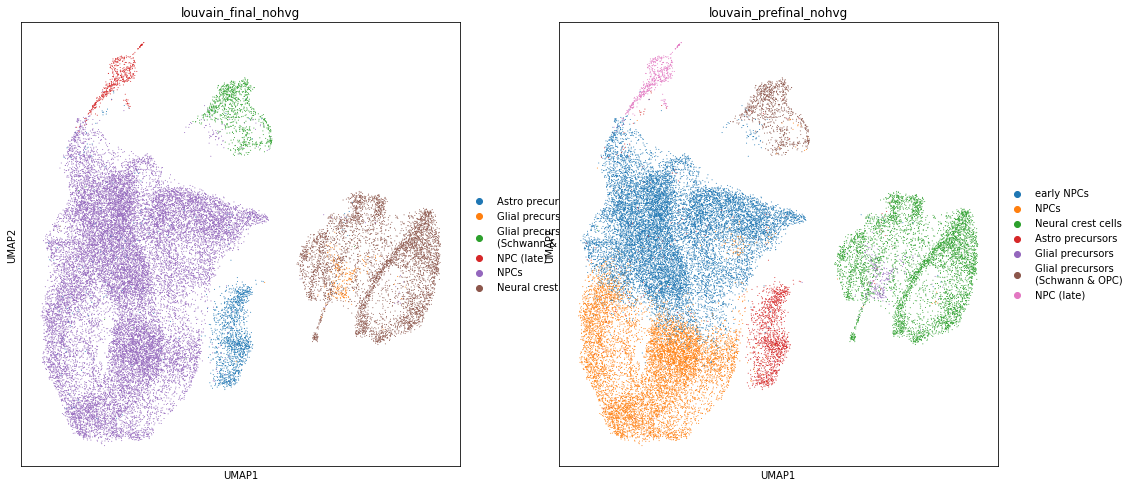

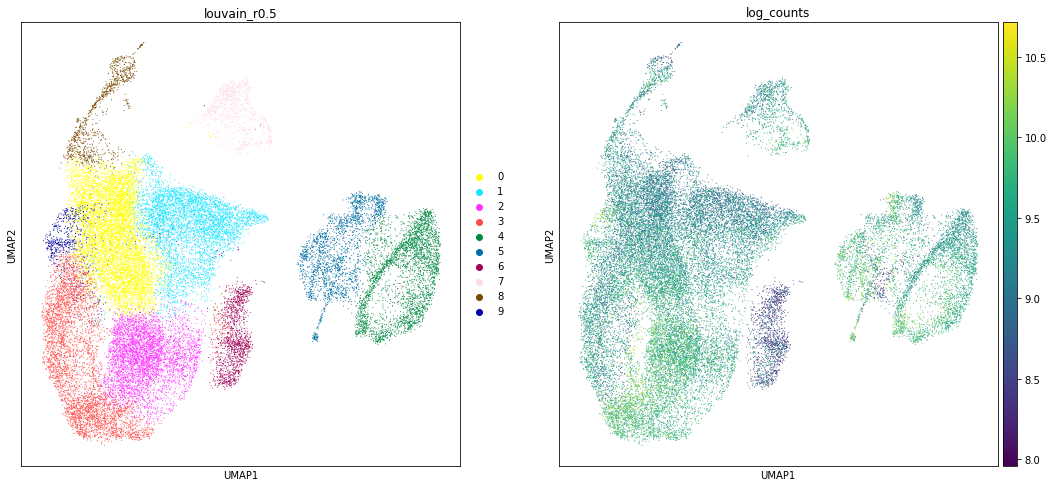

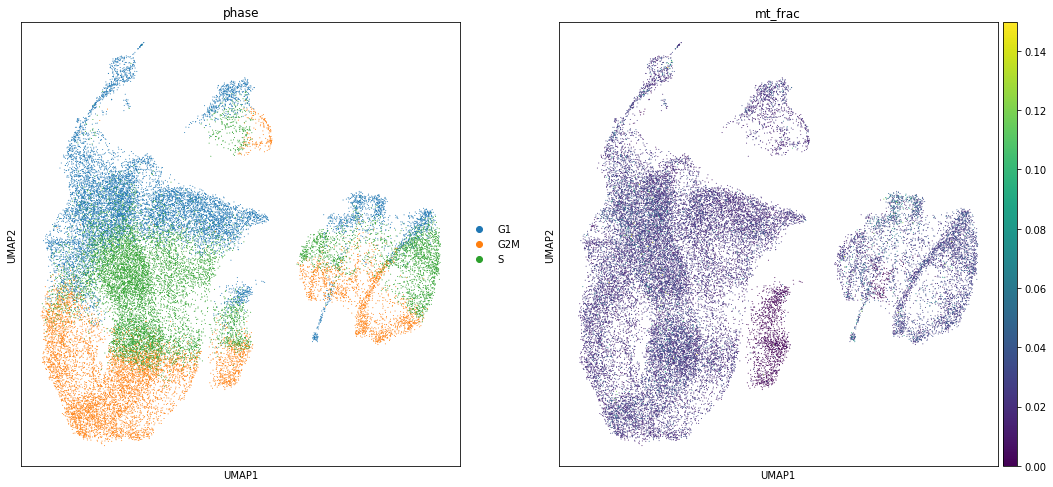

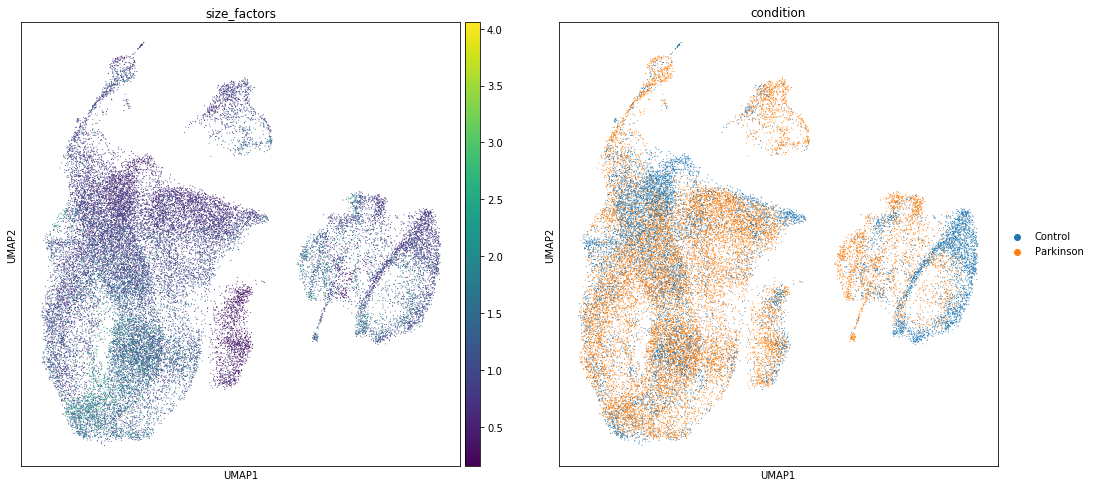

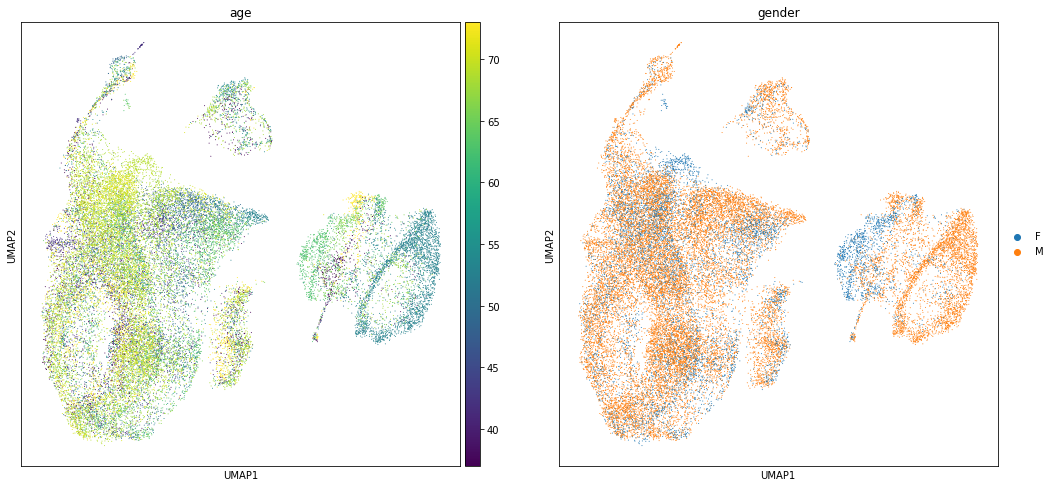

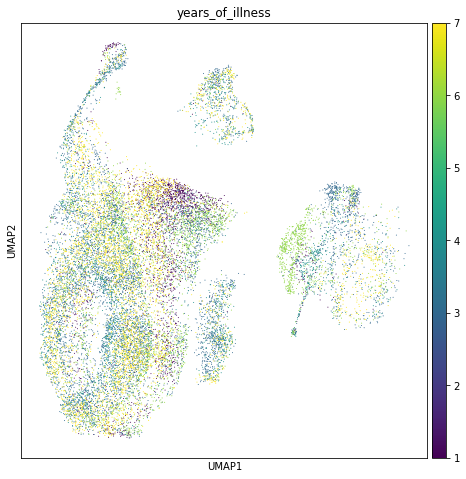

In [14]:
sc.pl.umap(adata, color=['louvain_r0.2', 'Donor'])
sc.pl.umap(adata, color=['louvain_r0.5', 'log_counts'])
sc.pl.umap(adata, color=['phase', 'mt_frac'])
sc.pl.umap(adata, color=['size_factors', 'condition'])
sc.pl.umap(adata, color=['age', 'gender'])
sc.pl.umap(adata, color='years_of_illness')

# Marker genes

In [15]:
sc.tl.rank_genes_groups(adata, groupby='louvain_r0.2', key_added='rank_genes_groups_r0.2')

ranking genes


/home/icb/malte.luecken/new_scanpy/scanpy/scanpy/tools/_rank_genes_groups.py:224: RuntimeWarning: invalid value encountered in log2
  rankings_gene_logfoldchanges.append(np.log2(foldchanges[global_indices]))


    finished (0:00:24.90) --> added to `.uns['rank_genes_groups_r0.2']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids


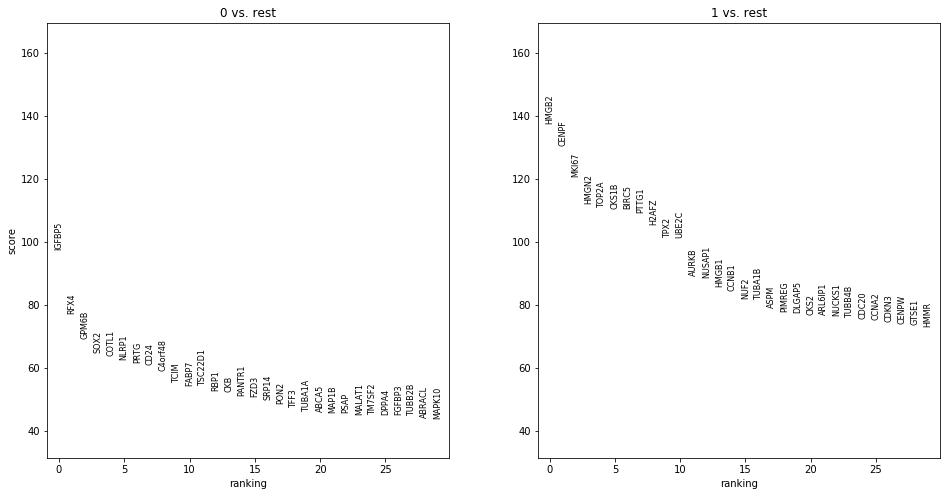

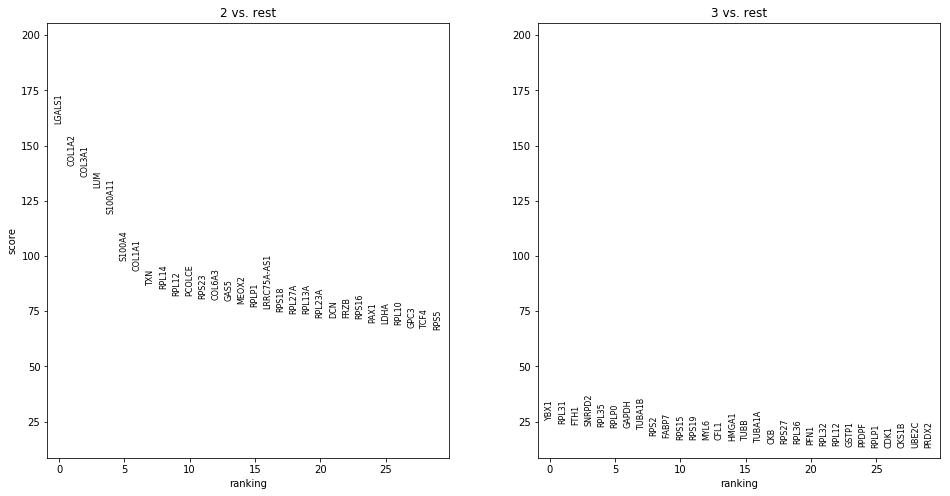

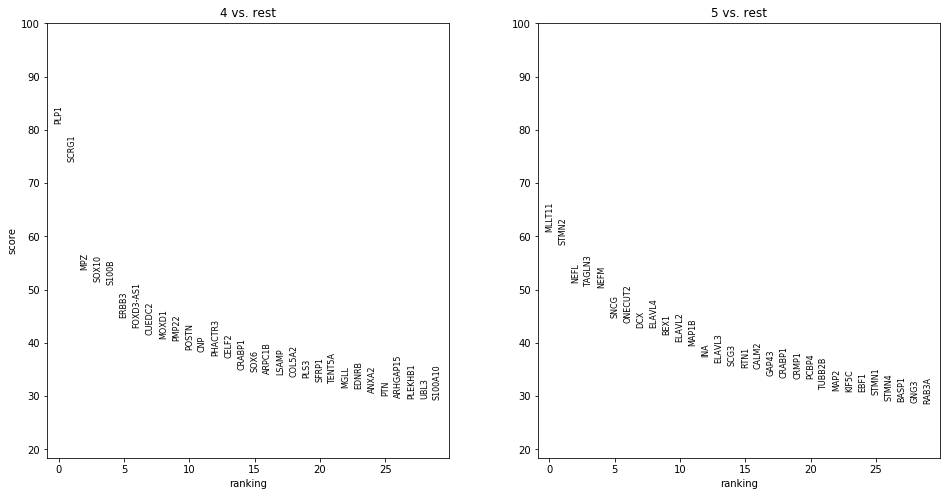

In [16]:
sc.pl.rank_genes_groups(adata, groups=['0','1'], n_genes=30, key='rank_genes_groups_r0.2')
sc.pl.rank_genes_groups(adata, groups=['2','3'], n_genes=30, key='rank_genes_groups_r0.2')
sc.pl.rank_genes_groups(adata, groups=['4','5'], n_genes=30, key='rank_genes_groups_r0.2')

## Marker gene overlaps

In [17]:
marker_genes = dict()
marker_genes['NSC (radial glia)'] = ['NES', 'SOX2', 'NOTCH1', 'HES1', 'HES3', 'OCLN', 'CDH1', 'SOX10', 'SOX9', 'SOX1', 'ASCL1', 'NOTCH2', 'OTX2', 'FUT4']
marker_genes['NPC'] = ['HMGB2', 'SOX1', 'SOX2', 'SOX11', 'FABP7', 'SFRP1', 'SFRP2', 'PAX6', 'STMN2', 'DCX', 'NES', 'HES1', 'HES5', 'NCAM1', 'ASCL1', 'NOTCH2', 'NOTCH3', 'TNFRSF19', 'OTX2']
marker_genes['NPC (late) / Imm. Neurons'] = ['EOMES', 'ASCL1', 'NEUROD1', 'DCX', 'NCAM1', 'MAP2', 'TUBB3', 'TUBB2A', 'ENO2', 'RBFOX3', 'NKX2-2', 'NGFR', 'HES5', 'CALB1', 'CALB2', 'EFNA2']
marker_genes['Dopaminergic'] = ['NR4A2', 'PBX1', 'GRIA3', 'TH', 'EN1', 'TMCC3', 'NTM', 'DDC', 'CAMK2N1', 'ALDH1A1', 'APP', 'PDZRN4', 'PCDH10', 'MEG3', 'ERBB4', 'SLC10A4', 'BEX5', 'FOXA2', 'NPY1R', 'GPC2', 'KCNJ6', 'LMX1B']
marker_genes['Glutamatergic'] = ['SLC1A1', 'SLC1A2', 'SLC1A3', 'SLC17A6', 'SLC17A7', 'GLS', 'GLS2', 'GRIN1', 'GRIN2A', 'GRIN2B', 'GRIN2C', 'GRIN2D', 'GRIN3A', 'GRIN3B', 'GRINA', 'GRIA1', 'GRIA2', 'GRIA3', 'GRIA4']
marker_genes['GABAergic'] = ['GAD1', 'GAD2', 'GABARAP', 'GABARAPL1', 'GABARAPL2', 'GABARAPL3', 'ABAT']
marker_genes['Serotonergic'] = ['SLC6A4', 'SLC18A2', 'TPH1', 'TPH2', 'FEV', 'HTR1D', 'HTR1DP1', 'HTR1E', 'HTR1F', 'HTR2A', 'HTR2A-AS1', 'HTR2B', 'HTR2C', 'HTR3A', 'HTR3B', 'HTR3D', 'HTR4', 'HTR5A', 'HTR5A-AS1', 'HTRA2', 'HTRA3', 'HTRA4', 'HTR5BP', 'HTR7P1', 'HTRA1']
marker_genes['NSC (neural crest)'] = ['COL3A1', 'COL1A2', 'LUM', 'INHCAP', 'IGF2', 'SEPT11', 'LGALS1', 'WNT2B', 'SNAI1', 'SNAI2', 'TFAP2A', 'FOXD3', 'TWIST1', 'ID1', 'MYC', 'SOX9', 'SOX10']
marker_genes['Glial precursor'] = ['VIM', 'S100B', 'SOX10', 'LGALS1', 'OLIG1', 'OLIG2', 'OLIG3', 'SCRG1', 'PDGFRA', 'NKX2-2', 'EGFR', 'NES']
marker_genes['OPC'] = ['PDGFRA', 'CSPG4', 'STMN1', 'STMN2', 'PLP1', 'OLIG1', 'OLIG2', 'OLIG3', 'CLDN11', 'MBP', 'MAG', 'SOX10', 'RTN4']
marker_genes['Astrocyte precursor'] = ['S100B', 'FABP7', 'OLIG2', 'TTYH1', 'VCAM1', 'UCHL1', 'UBL3', 'TUBB3', 'TTYH2', 'S100A13', 'S100A16', 'NCAN', 'MEIS1', 'FABP5', 'DBX2', 'C1orf122', 'NOTCH3', 'NOTCH2', 'NKAIN4', 'DCXR', 'DCN', 'CD63', 'CD24', 'CCDC80', 'CBS', 'TCIM', 'C3orf70', 'C2orf72', 'C1orf61', 'GFAP', 'SLC1A3', 'SLC1A2', 'ALDH1L1', 'GLUL', 'PBXIP1'] #Similar to glial precursors
marker_genes['Microglia'] = ['VAMP8', 'VAV1', 'VMP1', 'VSIG4', 'TLR10', 'TLR4', 'TLR7', 'STAB1', 'STMN1', 'SOX11', 'SOX4', 'SP100', 'TMEM273', 'TPX2', 'C2', 'C1QC', 'C1QB', 'C1QA', 'C1orf61', 'C12orf75', 'VSIR', 'ITGAM', 'PTPRC', 'AIF1', 'CD68', 'CD40']
marker_genes['Schwann cell precursor'] = ['SOX10', 'GAP43', 'FABP7', 'MPZ', 'DHH', 'NGFR', 'S100B']

In [18]:
marker_genes_2 = dict()
marker_genes_2['NSC radial glia'] = ['NES', 'SOX2', 'HES1', 'HES3', 'FABP7', 'SLC1A3']
marker_genes_2['NPC'] = ['SOX1', 'SOX2', 'PAX6', 'NES', 'HES1', 'HES5', 'GLI3']
marker_genes_2['NPC late and Imm. Neurons'] = ['DCX', 'MAP2', 'TUBB3', 'NKX2-2', 'CALB1', 'CALB2', 'ASCL1', 'NEUROD1']
marker_genes_2['Dopaminergic'] = ['NR4A2', 'PBX1', 'TH', 'EN1', 'FOXA2', 'LMX1B', 'EN2']
marker_genes_2['Glutamatergic'] = ['GRIN1', 'GRIN2A', 'GRIN2B', 'GRIN2C', 'GRIN2D', 'GRIN3A', 'GRIN3B', 'GRINA', 'GRIA1', 'GRIA2', 'GRIA3', 'GRIA4']
marker_genes_2['GABAergic'] = ['GAD1', 'GAD2']
marker_genes_2['Serotonergic'] = ['TPH1', 'TPH2', 'SLC6A4', 'FEV']
marker_genes_2['Cholinergic'] = ['CHAT', 'SLC18A3', 'ACHE']
marker_genes_2['NSC neural crest'] = ['LUM', 'SNAI1', 'TWIST1', 'SOX9', 'SOX10', 'SNAI2', 'B3GAT1']
marker_genes_2['OPC'] = ['PDGFRA', 'STMN1', 'STMN2', 'OLIG1', 'OLIG2', 'OLIG3', 'SOX10', 'CSPG4']
marker_genes_2['Astrocyte precursor'] = ['S100B', 'GFAP', 'CD44', 'VIM', 'ALDOC']
marker_genes_2['Microglia'] = ['SOX11', 'SOX4', 'PTPRC', 'CD68', 'ITGAM', 'AIF1']
marker_genes_2['Schwann cell precursor'] = ['SOX10', 'GAP43', 'FABP7', 'MPZ', 'DHH', 'NGFR']

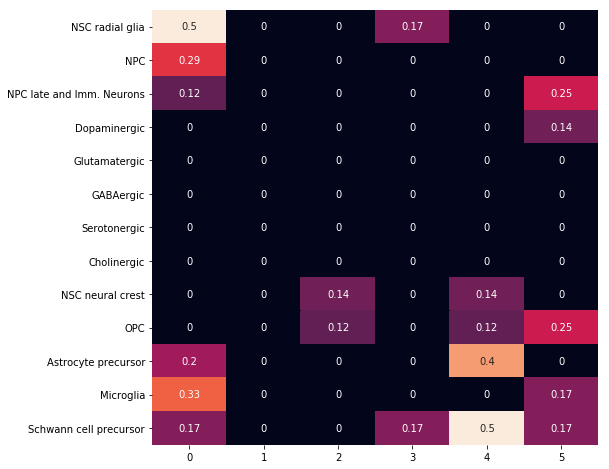

In [19]:
#Overlap with newer marker gene sets
sb.heatmap(sc.tl.marker_gene_overlap(adata, marker_genes_2, key='rank_genes_groups_r0.2', normalize='reference'), cbar=False, annot=True)

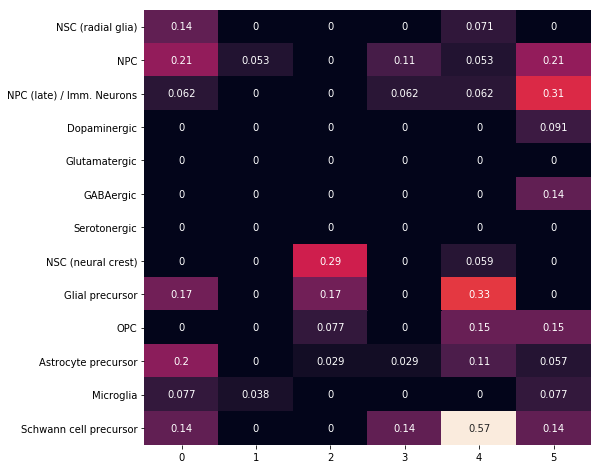

In [20]:
#Overlap with older marker gene sets
sb.heatmap(sc.tl.marker_gene_overlap(adata, marker_genes, key='rank_genes_groups_r0.2', normalize='reference'), cbar=False, annot=True)

In [21]:
#Score of newer marker gene sets
groups = adata.obs['louvain_r0.2'].cat.categories
df = np.zeros((len(marker_genes_2), len(groups)))
i=-1
for marker in marker_genes_2:
    i+=1
    sc.tl.score_genes(adata, marker_genes_2[marker])
    j = 0
    for group in groups:
        df[i, j] = np.mean(adata.obs['score'][adata.obs['louvain_r0.2'] == group])
        j += 1
cells = marker_genes_2.keys()
res = pd.DataFrame(df, index = cells, columns = groups)
sb.heatmap(res, annot = True)

computing score 'score'
    finished (0:00:14.89) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:14.75) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.35) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:17.60) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.67) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.62) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.75) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.15) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.66) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.47) --> added
    'score', 

    finished (0:00:16.32) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.77) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.78) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.69) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.79) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:17.11) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.88) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.43) --> added
    'score', score of gene set (adata.obs)


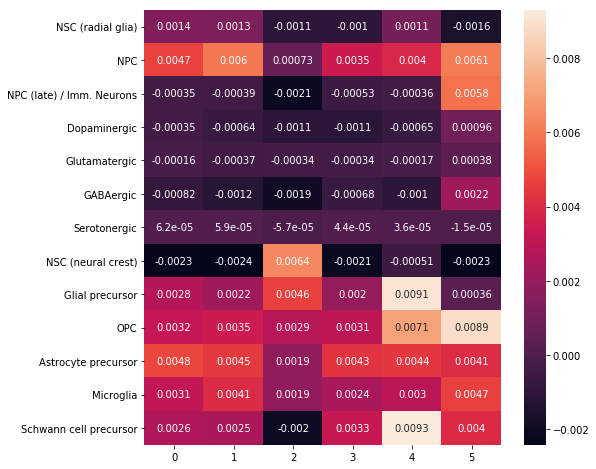

In [22]:
#Score of older marker gene sets
groups = adata.obs['louvain_r0.2'].cat.categories
df = np.zeros((len(marker_genes), len(groups)))
i=-1
for marker in marker_genes:
    i+=1
    sc.tl.score_genes(adata, marker_genes[marker])
    j = 0
    for group in groups:
        df[i, j] = np.mean(adata.obs['score'][adata.obs['louvain_r0.2'] == group])
        j += 1
cells = marker_genes.keys()
res = pd.DataFrame(df, index = cells, columns = groups)
sb.heatmap(res, annot = True)

Marker-determined cluster assignment:

- 0: NPCs and some astrocytes
- 1: NPC (early?)
- 2: Neural crest NPCs and some glial precursors
- 3: Astro prec and NPC?
- 4: Glial precursors (OPC & Schwann)
- 5: NPC (late)

# Gene set enrichment on marker genes

In [23]:
#GO:BP enrichment of marker gene sets for further support of cluster annotation
pd.set_option("display.max_colwidth", 800)

for i in [str(i) for i in range(6)]:
    print(f"Cluster {i}:")
    clust_enrichment = gprofiler(adata.uns['rank_genes_groups_r0.2']['names'][i], custom_bg=adata.var_names.tolist(), organism='hsapiens', correction_method='fdr', src_filter=['GO:BP'])
    clust_enrichment = clust_enrichment.sort_values('p.value').iloc[:,[2,3,5,6,11]]
    clust_enrichment.iloc[:50,:]
    print("")

Cluster 0:


p.value  term.size  overlap.size  recall  \
term.id                                                     
GO:2000026  1.280000e-07       1636            35   0.365   
GO:0050793  9.350000e-07       2101            38   0.396   
GO:0051094  6.680000e-06       1130            26   0.271   
GO:0048731  6.680000e-06       3840            51   0.531   
GO:0007275  8.560000e-06       4285            54   0.562   
GO:0051960  8.600000e-06        775            21   0.219   
GO:0051239  9.910000e-06       2385            38   0.396   
GO:0045595  1.080000e-05       1484            29   0.302   
GO:0032501  1.230000e-05       5529            62   0.646   
GO:0042063  1.270000e-05        237            12   0.125   
GO:0048856  2.660000e-05       4659            55   0.573   
GO:0007399  2.660000e-05       2077            34   0.354   
GO:0032502  3.620000e-05       4989            57   0.594   
GO:0010001  5.130000e-05        178            10   0.104   
GO:0050767  8.530000e-05        695            18   0.188   
GO:0060284  1.120000e-04        790            19   0.198   
GO:0051240  1.270000e-04       1328            25   0.260   
GO:0051961  1.410000e-04        256            11   0.115   
GO:0009888  1.770000e-04       1457            26   0.271   
GO:0007417  2.290000e-04        841            19   0.198   
GO:0048513  3.170000e-04       2713            37   0.385   
GO:0014013  3.720000e-04         94             7   0.073   
GO:0060429  4.420000e-04        890            19   0.198   
GO:0050768  4.420000e-04        239            10   0.104   
GO:0045597  4.610000e-04        810            18   0.188   
GO:0045596  5.060000e-04        579            15   0.156   
GO:0035270  7.400000e-04        108             7   0.073   
GO:0030154  7.640000e-04       3219            40   0.417   
GO:0035295  7.770000e-04        852            18   0.188   
GO:0051093  8.480000e-04        774            17   0.177   
GO:0051962  8.960000e-04        470            13   0.135   
GO:0010721  8.960000e-04        271            10   0.104   
GO:0070445  8.960000e-04          7             3   0.031   
GO:0070444  8.960000e-04          7             3   0.031   
GO:0048869  8.960000e-04       3381            41   0.427   
GO:0007166  9.210000e-04       2310            32   0.333   
GO:0050789  1.270000e-03       9121            78   0.812   
GO:0048709  1.360000e-03         83             6   0.062   
GO:0048518  1.770000e-03       4712            50   0.521   
GO:0042127  1.880000e-03       1315            22   0.229   
GO:0002065  2.030000e-03         91             6   0.062   
GO:0065007  2.030000e-03       9611            80   0.833   
GO:0060322  2.030000e-03        677            15   0.156   
GO:0045665  2.030000e-03        187             8   0.083   
GO:0048468  2.200000e-03       1757            26   0.271   
GO:0050794  2.900000e-03       8601            74   0.771   
GO:0060174  2.900000e-03         11             3   0.031   
GO:0010720  2.900000e-03        465            12   0.125   
GO:0007420  3.540000e-03        637            14   0.146   
GO:0030855  3.540000e-03        477            12   0.125   

                                                                  term.name  
term.id                                                                      
GO:2000026               regulation of multicellular organismal development  
GO:0050793                              regulation of developmental process  
GO:0051094                     positive regulation of developmental process  
GO:0048731                                               system development  
GO:0007275                               multicellular organism development  
GO:0051960                         regulation of nervous system development  
GO:0051239                   regulation of multicellular organismal process  
GO:0045595                               regulation of cell differentiation  
GO:0032501                                 multicellular organis


Cluster 1:


p.value  term.size  overlap.size  recall  \
term.id                                                     
GO:0051301  1.660000e-54        547            58   0.586   
GO:0000278  8.470000e-50        882            63   0.636   
GO:1903047  2.770000e-49        724            59   0.596   
GO:0007059  1.070000e-46        290            44   0.444   
GO:0007049  1.560000e-45       1608            72   0.727   
GO:0140014  7.170000e-45        248            41   0.414   
GO:0000280  3.900000e-44        361            45   0.455   
GO:0022402  2.010000e-42       1126            62   0.626   
GO:0048285  5.630000e-42        404            45   0.455   
GO:0000819  9.300000e-40        169            34   0.343   
GO:0051276  8.180000e-39       1063            58   0.586   
GO:0000070  1.100000e-38        145            32   0.323   
GO:0098813  4.390000e-38        232            36   0.364   
GO:0006996  4.080000e-27       3398            75   0.758   
GO:0051726  2.360000e-26       1046            47   0.475   
GO:0007051  7.850000e-25        153            24   0.242   
GO:0007346  3.500000e-24        571            36   0.364   
GO:0010564  5.680000e-24        626            37   0.374   
GO:0007017  7.910000e-24        681            38   0.384   
GO:1902850  1.790000e-22        122            21   0.212   
GO:0044772  3.110000e-22        470            32   0.323   
GO:0051983  7.630000e-22         92            19   0.192   
GO:0044770  2.320000e-21        503            32   0.323   
GO:0000226  4.050000e-21        469            31   0.313   
GO:0007052  4.650000e-21        101            19   0.192   
GO:0051783  1.200000e-19        166            21   0.212   
GO:0007088  2.990000e-19        148            20   0.202   
GO:0071103  7.620000e-18        233            22   0.222   
GO:0006323  1.340000e-16        171            19   0.192   
GO:0010965  4.530000e-16         51            13   0.131   
GO:0051306  9.960000e-16         54            13   0.131   
GO:1901990  9.980000e-16        333            23   0.232   
GO:1905818  1.250000e-15         55            13   0.131   
GO:0016043  1.630000e-15       5434            77   0.778   
GO:0051304  4.250000e-15         78            14   0.141   
GO:0033047  5.060000e-15         61            13   0.131   
GO:1901987  5.610000e-15        362            23   0.232   
GO:0031145  1.020000e-14         35            11   0.111   
GO:0071840  1.090000e-14       5606            77   0.778   
GO:0007091  1.190000e-14         49            12   0.121   
GO:0044784  1.530000e-14         50            12   0.121   
GO:0033045  4.500000e-14         72            13   0.131   
GO:0051225  5.600000e-14         94            14   0.141   
GO:0044839  6.830000e-14        208            18   0.182   
GO:0051383  1.030000e-13         20             9   0.091   
GO:0000086  2.750000e-13        192            17   0.172   
GO:0008608  2.990000e-13         33            10   0.101   
GO:1902749  3.070000e-13        162            16   0.162   
GO:0030071  3.070000e-13         47            11   0.111   
GO:1902099  3.860000e-13         48            11   0.111   

                                                                     term.name  
term.id                                                                         
GO:0051301                                                       cell division  
GO:0000278                                                  mitotic cell cycle  
GO:1903047                                          mitotic cell cycle process  
GO:0007059                                              chromosome segregation  
GO:0007049                                                          cell cycle  
GO:0140014                                            mitotic nuclear division  
GO:0000280                                                    nuclear division  
GO:0022402                                                  cell cycle process  
GO:0048285                        


Cluster 2:


p.value  term.size  overlap.size  recall  \
term.id                                                     
GO:0006614  2.480000e-56         92            37   0.389   
GO:0006613  2.300000e-55         98            37   0.389   
GO:0045047  6.060000e-55        101            37   0.389   
GO:0072599  2.630000e-54        105            37   0.389   
GO:0000184  6.430000e-52        120            37   0.389   
GO:0070972  2.290000e-51        124            37   0.389   
GO:0006612  1.090000e-46        161            37   0.389   
GO:0006413  8.570000e-46        188            38   0.400   
GO:0000956  5.500000e-43        200            37   0.389   
GO:0006402  1.990000e-38        289            38   0.400   
GO:0090150  6.900000e-38        272            37   0.389   
GO:0006401  9.770000e-37        320            38   0.400   
GO:0006605  6.300000e-34        379            38   0.400   
GO:0034655  7.200000e-31        495            39   0.411   
GO:0072594  1.280000e-30        503            39   0.411   
GO:0046700  6.860000e-30        526            39   0.411   
GO:0044270  8.180000e-30        529            39   0.411   
GO:0019439  1.730000e-29        540            39   0.411   
GO:1901361  6.720000e-29        560            39   0.411   
GO:0006412  6.540000e-28        595            39   0.411   
GO:0072657  1.030000e-27        515            37   0.389   
GO:0043043  2.010000e-27        614            39   0.411   
GO:0043604  1.160000e-24        729            39   0.411   
GO:0006518  1.160000e-24        729            39   0.411   
GO:0033365  2.650000e-24        800            40   0.421   
GO:0016071  2.280000e-23        737            38   0.400   
GO:0006886  6.760000e-22        929            40   0.421   
GO:0043603  1.490000e-20        947            39   0.411   
GO:0009057  1.660000e-19       1219            42   0.442   
GO:0002181  4.280000e-19         90            17   0.179   
GO:0044265  1.930000e-18       1024            38   0.400   
GO:1901566  2.040000e-18       1623            46   0.484   
GO:0048519  9.800000e-18       4326            70   0.737   
GO:0010629  1.430000e-16       1550            43   0.453   
GO:1901575  5.690000e-16       1781            45   0.474   
GO:0010605  8.830000e-16       2270            50   0.526   
GO:0015031  2.540000e-15       1678            43   0.453   
GO:0015833  4.250000e-15       1703            43   0.453   
GO:0042886  5.900000e-15       1719            43   0.453   
GO:0034613  1.290000e-14       1583            41   0.432   
GO:0070727  1.550000e-14       1592            41   0.432   
GO:0009892  1.750000e-14       2445            50   0.526   
GO:0045184  1.990000e-14       1780            43   0.453   
GO:0046907  5.180000e-14       1564            40   0.421   
GO:0042254  2.840000e-13        273            19   0.200   
GO:0044248  3.120000e-13       1923            43   0.453   
GO:0071705  4.690000e-13       1946            43   0.453   
GO:0009056  4.690000e-13       2139            45   0.474   
GO:0071702  3.370000e-12       2261            45   0.474   
GO:0022613  6.920000e-12        425            21   0.221   

                                                                                 term.name  
term.id                                                                                     
GO:0006614                     SRP-dependent cotranslational protein targeting to membrane  
GO:0006613                                   cotranslational protein targeting to membrane  
GO:0045047                                                         protein targeting to ER  
GO:0072599                  establishment of protein localization to endoplasmic reticulum  
GO:0000184             nuclear-transcribed mRNA catabolic process, nonsense-mediated decay  
GO:0070972                                   protein localization to endoplasmic reticulum  
GO:0006612                                                   protein targeting to membrane  
GO:0006


Cluster 3:


p.value  term.size  overlap.size  recall  \
term.id                                                     
GO:0006614  6.210000e-60         92            39   0.394   
GO:0006613  7.090000e-59         98            39   0.394   
GO:0045047  1.540000e-58        101            39   0.394   
GO:0072599  8.060000e-58        105            39   0.394   
GO:0000184  3.680000e-55        120            39   0.394   
GO:0070972  1.440000e-54        124            39   0.394   
GO:0006612  1.250000e-49        161            39   0.394   
GO:0000956  1.980000e-47        200            40   0.404   
GO:0006413  7.960000e-47        188            39   0.394   
GO:0090150  1.920000e-43        272            41   0.414   
GO:0006402  2.460000e-42        289            41   0.414   
GO:0006401  1.810000e-40        320            41   0.414   
GO:0034655  3.480000e-38        495            45   0.455   
GO:0046700  4.900000e-37        526            45   0.455   
GO:0044270  6.040000e-37        529            45   0.455   
GO:0019439  1.460000e-36        540            45   0.455   
GO:1901361  7.160000e-36        560            45   0.455   
GO:0072594  3.480000e-35        503            43   0.434   
GO:0006605  1.280000e-34        379            39   0.394   
GO:0072657  2.040000e-33        515            42   0.424   
GO:0006412  3.880000e-32        595            43   0.434   
GO:0043043  1.420000e-31        614            43   0.434   
GO:0044265  2.380000e-31       1024            51   0.515   
GO:0006518  6.320000e-31        729            45   0.455   
GO:0033365  2.190000e-30        800            46   0.465   
GO:0043604  1.600000e-28        729            43   0.434   
GO:0009057  9.450000e-28       1219            51   0.515   
GO:0016071  3.690000e-27        737            42   0.424   
GO:0043603  4.240000e-26        947            45   0.455   
GO:0006886  3.440000e-23        929            42   0.424   
GO:0051641  4.100000e-23       2469            62   0.626   
GO:1901575  6.240000e-23       1781            54   0.545   
GO:0044248  2.770000e-22       1923            55   0.556   
GO:0010629  5.670000e-22       1550            50   0.505   
GO:0046907  8.340000e-22       1564            50   0.505   
GO:0051649  4.190000e-21       1864            53   0.535   
GO:1901566  4.250000e-21       1623            50   0.505   
GO:0034613  1.190000e-20       1583            49   0.495   
GO:0070727  1.460000e-20       1592            49   0.495   
GO:0009056  4.340000e-20       2139            55   0.556   
GO:0002181  7.740000e-19         90            17   0.172   
GO:0015031  1.070000e-18       1678            48   0.485   
GO:0045184  1.730000e-18       1780            49   0.495   
GO:0015833  1.930000e-18       1703            48   0.485   
GO:0042886  2.820000e-18       1719            48   0.485   
GO:0010605  4.690000e-18       2270            54   0.545   
GO:0042254  1.110000e-17        273            23   0.232   
GO:0071705  7.050000e-17       1946            49   0.495   
GO:0009892  1.380000e-16       2445            54   0.545   
GO:0008104  1.380000e-16       2348            53   0.535   

                                                                                term.name  
term.id                                                                                    
GO:0006614                    SRP-dependent cotranslational protein targeting to membrane  
GO:0006613                                  cotranslational protein targeting to membrane  
GO:0045047                                                        protein targeting to ER  
GO:0072599                 establishment of protein localization to endoplasmic reticulum  
GO:0000184            nuclear-transcribed mRNA catabolic process, nonsense-mediated decay  
GO:0070972                                  protein localization to endoplasmic reticulum  
GO:0006612                                                  protein targeting to membrane  
GO:0000956      


Cluster 4:


p.value  term.size  overlap.size  recall  \
term.id                                                     
GO:0048870  8.040000e-08       1208            30   0.309   
GO:0040011  8.040000e-08       1399            32   0.330   
GO:0022008  8.040000e-08       1395            32   0.330   
GO:0051674  8.040000e-08       1208            30   0.309   
GO:0016477  1.220000e-07       1099            28   0.289   
GO:0048666  1.470000e-07        960            26   0.268   
GO:0051239  2.800000e-07       2385            41   0.423   
GO:0031175  2.840000e-07        851            24   0.247   
GO:0048699  5.810000e-07       1309            29   0.299   
GO:0007399  6.310000e-07       2077            37   0.381   
GO:0001568  6.710000e-07        559            19   0.196   
GO:0050793  7.550000e-07       2101            37   0.381   
GO:0006928  8.040000e-07       1622            32   0.330   
GO:0048731  8.040000e-07       3840            52   0.536   
GO:0030182  8.810000e-07       1183            27   0.278   
GO:0048856  9.090000e-07       4659            58   0.598   
GO:0001944  9.900000e-07        585            19   0.196   
GO:0009653  1.100000e-06       2163            37   0.381   
GO:0048468  1.100000e-06       1757            33   0.340   
GO:0072358  1.100000e-06        594            19   0.196   
GO:0048514  1.990000e-06        486            17   0.175   
GO:0035239  2.180000e-06        693            20   0.206   
GO:0035295  2.620000e-06        852            22   0.227   
GO:0007275  2.750000e-06       4285            54   0.557   
GO:0032502  3.150000e-06       4989            59   0.608   
GO:0072359  5.900000e-06        897            22   0.227   
GO:0032501  6.690000e-06       5529            62   0.639   
GO:0048869  6.690000e-06       3381            46   0.474   
GO:0051241  8.760000e-06        924            22   0.227   
GO:0001935  9.440000e-06        121             9   0.093   
GO:0051270  9.880000e-06        775            20   0.206   
GO:2000145  1.060000e-05        704            19   0.196   
GO:0009605  1.070000e-05       1667            30   0.309   
GO:0000902  1.070000e-05        865            21   0.216   
GO:0061564  1.070000e-05        433            15   0.155   
GO:0050673  1.070000e-05        315            13   0.134   
GO:0030154  1.100000e-05       3219            44   0.454   
GO:0050678  1.660000e-05        273            12   0.124   
GO:0030334  1.820000e-05        663            18   0.186   
GO:0010001  1.880000e-05        178            10   0.103   
GO:0048646  2.030000e-05        905            21   0.216   
GO:2000026  2.110000e-05       1636            29   0.299   
GO:0001525  2.680000e-05        407            14   0.144   
GO:0040012  2.710000e-05        763            19   0.196   
GO:0042063  2.790000e-05        237            11   0.113   
GO:0001936  3.050000e-05        106             8   0.082   
GO:0050680  3.920000e-05        110             8   0.082   
GO:0032989  3.920000e-05        950            21   0.216   
GO:0120036  4.260000e-05       1313            25   0.258   
GO:0030030  6.280000e-05       1342            25   0.258   

                                                                term.name  
term.id                                                                    
GO:0048870                                                  cell motility  
GO:0040011                                                     locomotion  
GO:0022008                                                   neurogenesis  
GO:0051674                                           localization of cell  
GO:0016477                                                 cell migration  
GO:0048666                                             neuron development  
GO:0051239                 regulation of multicellular organismal process  
GO:0031175                                  neuron projection development  
GO:0048699                                          generation of neurons  
GO:00073


Cluster 5:


p.value  term.size  overlap.size  recall  \
term.id                                                     
GO:0007399  4.090000e-11       2077            45   0.455   
GO:0030182  1.080000e-09       1183            32   0.323   
GO:0048666  1.080000e-09        960            29   0.293   
GO:0031175  2.100000e-09        851            27   0.273   
GO:0048699  2.240000e-09       1309            33   0.333   
GO:0022008  1.110000e-08       1395            33   0.333   
GO:0048812  2.130000e-08        559            21   0.212   
GO:0120039  3.100000e-08        573            21   0.212   
GO:0048858  3.170000e-08        576            21   0.212   
GO:0120036  3.460000e-08       1313            31   0.313   
GO:0032990  5.040000e-08        595            21   0.212   
GO:0030030  5.280000e-08       1342            31   0.313   
GO:0048667  1.070000e-07        500            19   0.192   
GO:0061564  5.110000e-07        433            17   0.172   
GO:0007409  1.070000e-06        398            16   0.162   
GO:0048468  1.590000e-06       1757            33   0.333   
GO:0000904  2.140000e-06        615            19   0.192   
GO:0030154  3.140000e-06       3219            46   0.465   
GO:0050768  5.990000e-06        239            12   0.121   
GO:0048731  8.630000e-06       3840            50   0.505   
GO:0051961  1.100000e-05        256            12   0.121   
GO:0048869  1.110000e-05       3381            46   0.465   
GO:0000902  1.480000e-05        865            21   0.212   
GO:0010721  1.880000e-05        271            12   0.121   
GO:0030307  2.710000e-05        140             9   0.091   
GO:0007275  3.220000e-05       4285            52   0.525   
GO:0032594  3.220000e-05         24             5   0.051   
GO:0032989  5.640000e-05        950            21   0.212   
GO:0060284  5.820000e-05        790            19   0.192   
GO:0120035  5.890000e-05        566            16   0.162   
GO:0045664  6.050000e-05        568            16   0.162   
GO:0031344  6.810000e-05        574            16   0.162   
GO:0032501  8.530000e-05       5529            60   0.606   
GO:0045927  1.130000e-04        219            10   0.101   
GO:0031346  1.270000e-04        335            12   0.121   
GO:0007417  1.270000e-04        841            19   0.192   
GO:0050767  1.560000e-04        695            17   0.172   
GO:1990138  2.290000e-04        141             8   0.081   
GO:0048588  2.300000e-04        189             9   0.091   
GO:0010975  2.300000e-04        425            13   0.131   
GO:0048639  2.830000e-04        146             8   0.081   
GO:0010976  2.880000e-04        249            10   0.101   
GO:0050794  2.930000e-04       8601            78   0.788   
GO:0048489  3.260000e-04        107             7   0.071   
GO:0097480  3.260000e-04        107             7   0.071   
GO:0048856  3.350000e-04       4659            52   0.525   
GO:0050772  3.900000e-04         73             6   0.061   
GO:0030705  4.090000e-04        157             8   0.081   
GO:0045666  4.740000e-04        329            11   0.111   
GO:0016079  4.830000e-04         77             6   0.061   

                                                                            term.name  
term.id                                                                                
GO:0007399                                                 nervous system development  
GO:0030182                                                     neuron differentiation  
GO:0048666                                                         neuron development  
GO:0031175                                              neuron projection development  
GO:0048699                                                      generation of neurons  
GO:0022008                                                               neurogenesis  
GO:0048812                                            neuron projection morphogenesis  
GO:0120039                      plasma membrane boun

Glial precursors have neurogenesis processes enriched in their marker genes (Cluster 4, which are allegedly OPC and Schwann cell precursors - myelinating glial cells). However, this enrichment is most clear in cluster 5, which is later stage NPCs.

NPCs and astro precursor clusters seem to be at an earlier stage of differentiation, as they mainly have metabolic activity markers.


- Cluster 0: Early stage NPCs, with also glial development annotations highly enriched. OPC development is enriched as well as general glial cell developmental processes.
- Cluster 1: Dominated by cell cycle effects. Seem to be proliferating NPCs/stem cells.
- Cluster 2: Enriched for translation and metabolic processes. Little information about cell type.
- Cluster 3: Again translation and metabolic processes. Little info about cell type.
- Cluster 4: Difficult cluster: enriched for "neuron development, "generation of neurons", but also "blood vessel development", and "blood vessel morphogenesis". Epithelial cell regulation and proliferation functions are further enriched. This could be astrocytes, which are involved with epithelial cell regulation and blood flow in the brain. Unsure whether this is a role astrocytes have at such early stages though. Maybe these are endothelial cells? Or endothelial cell progenitors? Do we expect these cells?
- Cluster 5: Clearly later stage NPCs, as they have synaptic vesicle transport upregulated, and other neurogenesis functions

## Potential cluster assignment:

Potential cluster assignment:

- 0: NPCs & glial precursors (branching point state)
- 1: Stem cells / NPCs
- 2: Neural crest cells
- 3: Glial precursors (Astro) (?)
- 4: Glial precursors (OPC & Schwann) (?)
- 5: NPC (late)


But:
- metabolic process enrichment could be related to glial cells like astrocytes, so cluster 2 may contain other cells as well?
- Maybe the non-HVG initial clustering was better?

## Revised cluster assignment:

- 0: Neural stem cells (NSC)
- 1: Neural stem cells (NSC) - proliferating
- 2: Neural crest cells (NCSC)
- 3: Unknown (glial)
- 4: Glial precursors (myelinating)
- 5: Neural precursor cell / immature neuron

## Subclustering

Subcluster clusters 0, and 4

### Cluster 0

In [24]:
sc.tl.louvain(adata, restrict_to=('louvain_r0.2', ['0']), resolution=0.2, key_added='louvain_r0.2_0_sub')

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:01.03) --> found 2 clusters and added
    'louvain_r0.2_0_sub', the cluster labels (adata.obs, categorical)


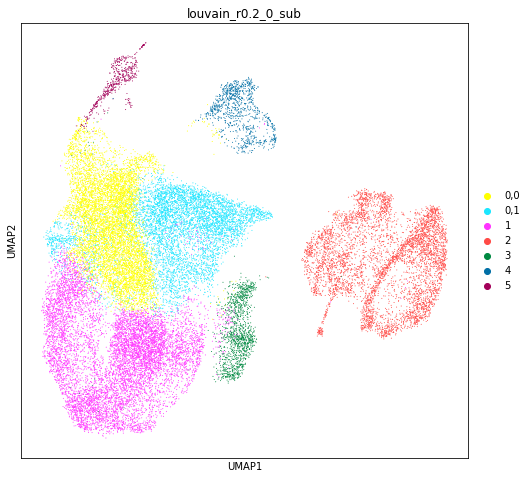

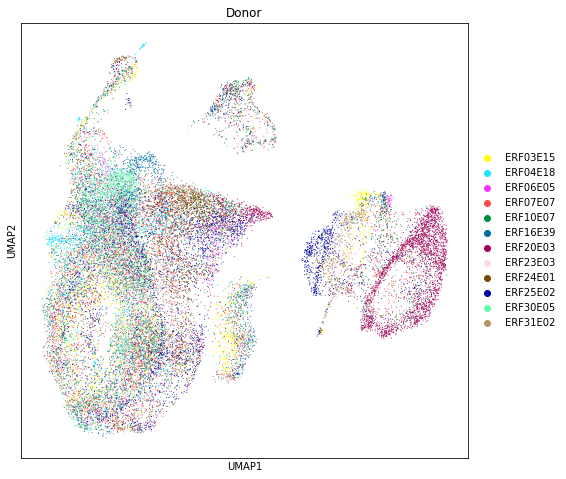

In [25]:
#Show the new clustering
sc.pl.umap(adata, color='louvain_r0.2_0_sub', palette=sc.pl.palettes.godsnot_64)
sc.pl.umap(adata, color='Donor', palette=sc.pl.palettes.godsnot_64)

In [26]:
#Get the new marker genes
sc.tl.rank_genes_groups(adata, groupby='louvain_r0.2_0_sub', key_added='rank_genes_r0.2_0_sub')

ranking genes
    finished (0:00:32.39) --> added to `.uns['rank_genes_r0.2_0_sub']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids


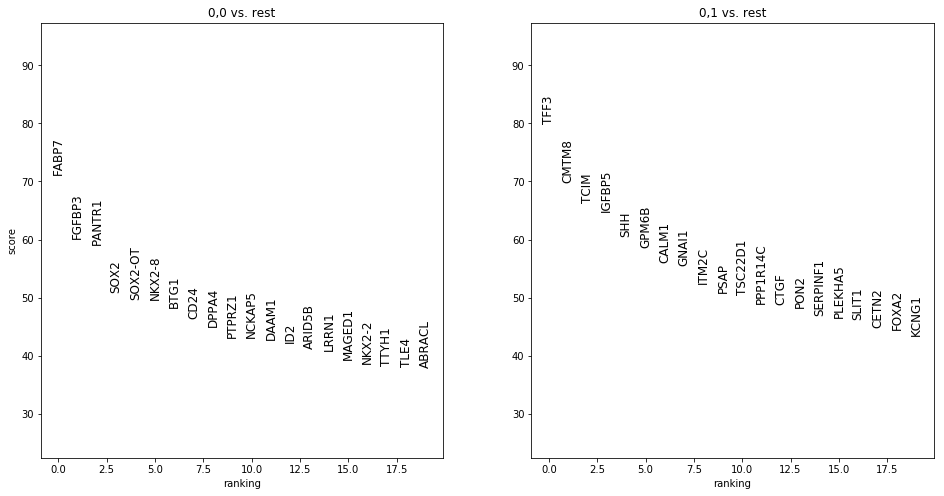

In [27]:
#Plot the new marker genes
sc.pl.rank_genes_groups(adata, key='rank_genes_r0.2_0_sub', groups=['0,0','0,1'], fontsize=12)

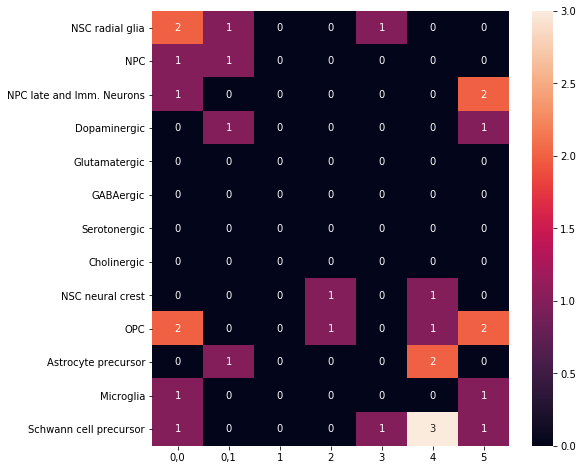

In [28]:
sb.heatmap(sc.tl.marker_gene_overlap(adata, marker_genes_2, key='rank_genes_r0.2_0_sub', normalize='None'), annot = True)

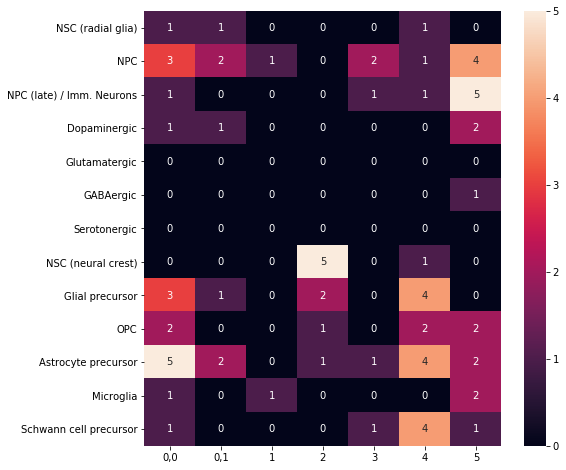

In [29]:
sb.heatmap(sc.tl.marker_gene_overlap(adata, marker_genes, key='rank_genes_r0.2_0_sub', normalize='None'), annot = True)

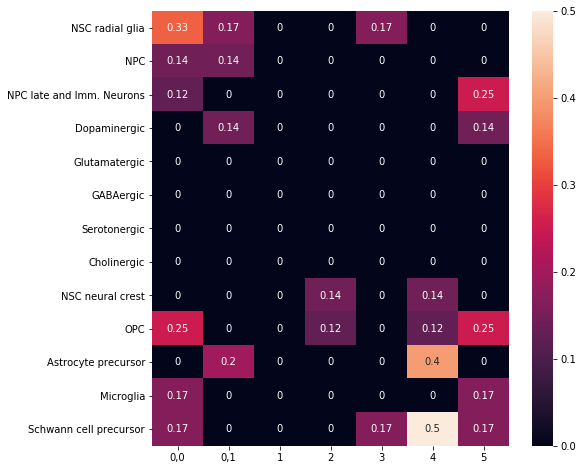

In [30]:
#Find marker overlap
sb.heatmap(sc.tl.marker_gene_overlap(adata, marker_genes_2, key='rank_genes_r0.2_0_sub', normalize='reference'), annot = True)

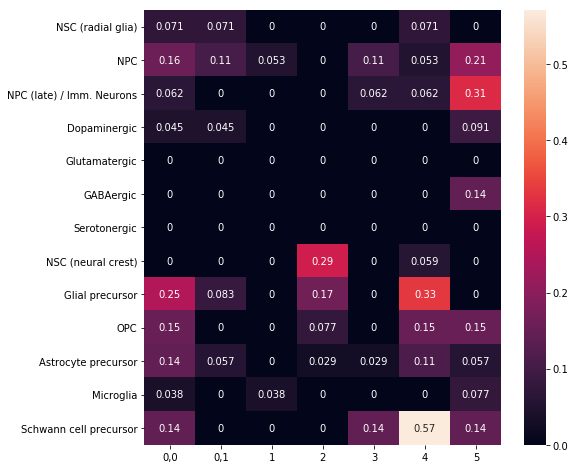

In [31]:
#Find marker overlap
sb.heatmap(sc.tl.marker_gene_overlap(adata, marker_genes, key='rank_genes_r0.2_0_sub', normalize='reference'), annot = True)

computing score 'score'
    finished (0:00:16.93) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.31) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.78) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:17.22) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:17.11) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.37) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.92) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.38) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.89) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:17.98) --> added
    'score', 

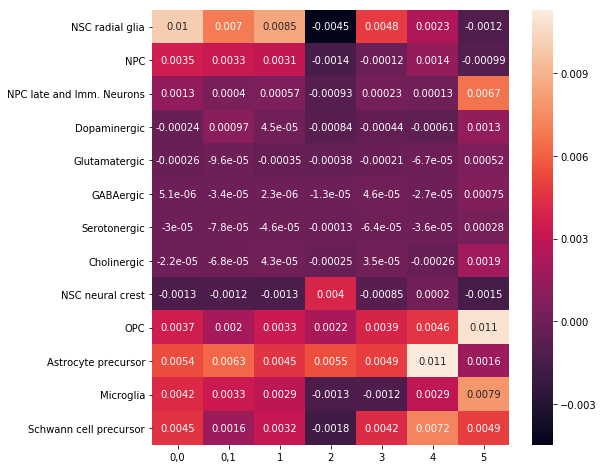

In [32]:
groups = adata.obs['louvain_r0.2_0_sub'].cat.categories
df = np.zeros((len(marker_genes_2), len(groups)))
i=-1
for marker in marker_genes_2:
    i+=1
    sc.tl.score_genes(adata, marker_genes_2[marker])
    j = 0
    for group in groups:
        df[i, j] = np.mean(adata.obs['score'][adata.obs['louvain_r0.2_0_sub'] == group])
        j += 1
cells = marker_genes_2.keys()
DF = pd.DataFrame(df, index = cells, columns = groups)
sb.heatmap(DF, annot = True)

computing score 'score'
    finished (0:00:16.92) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:17.09) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:17.26) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.76) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.62) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:17.41) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.86) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:17.02) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.60) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.58) --> added
    'score', 

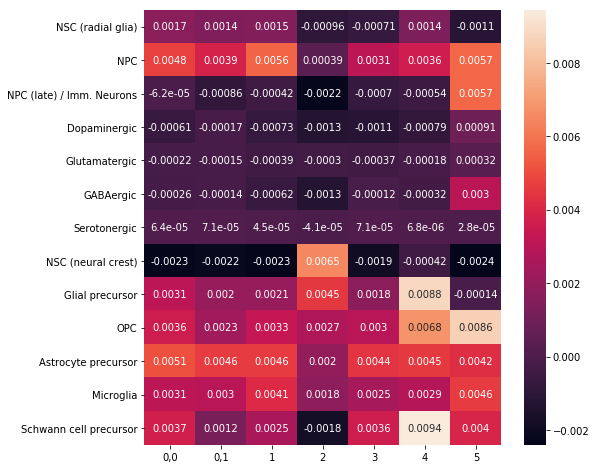

In [33]:
groups = adata.obs['louvain_r0.2_0_sub'].cat.categories
df = np.zeros((len(marker_genes), len(groups)))
i=-1
for marker in marker_genes:
    i+=1
    sc.tl.score_genes(adata, marker_genes[marker])
    j = 0
    for group in groups:
        df[i, j] = np.mean(adata.obs['score'][adata.obs['louvain_r0.2_0_sub'] == group])
        j += 1
cells = marker_genes.keys()
DF = pd.DataFrame(df, index = cells, columns = groups)
sb.heatmap(DF, annot = True)

In [34]:
#GO:BP enrichment of marker gene sets for further support of cluster annotation
pd.set_option("display.max_colwidth", 800)

for i in ['0,0', '0,1']:
    print(f"Cluster {i}:")
    clust_enrichment = gprofiler(adata.uns['rank_genes_r0.2_0_sub']['names'][i], custom_bg=adata.var_names.tolist(), organism='hsapiens', correction_method='fdr', src_filter=['GO:BP'])
    clust_enrichment = clust_enrichment.sort_values('p.value').iloc[:,[2,3,5,6,11]]
    clust_enrichment.iloc[:50,:]
    print("")

Cluster 0,0:


p.value  term.size  overlap.size  recall  \
term.id                                                     
GO:0010001  1.460000e-08        178            14   0.151   
GO:2000026  2.110000e-08       1636            35   0.376   
GO:0051239  2.300000e-08       2385            42   0.452   
GO:0051960  2.300000e-08        775            24   0.258   
GO:0007417  2.300000e-08        841            25   0.269   
GO:0048709  4.840000e-08         83            10   0.108   
GO:0045595  5.390000e-08       1484            32   0.344   
GO:0050767  6.570000e-08        695            22   0.237   
GO:0050793  6.570000e-08       2101            38   0.409   
GO:0042063  6.840000e-08        237            14   0.151   
GO:0060284  9.930000e-08        790            23   0.247   
GO:0032501  1.040000e-07       5529            64   0.688   
GO:0032502  1.370000e-07       4989            60   0.645   
GO:0022008  1.370000e-07       1395            30   0.323   
GO:0048699  1.370000e-07       1309            29   0.312   
GO:0051961  1.370000e-07        256            14   0.151   
GO:0048663  2.630000e-07         54             8   0.086   
GO:0030182  2.820000e-07       1183            27   0.290   
GO:0051094  4.490000e-07       1130            26   0.280   
GO:0045165  4.490000e-07        195            12   0.129   
GO:0050768  4.490000e-07        239            13   0.140   
GO:0001708  8.220000e-07         64             8   0.086   
GO:0014013  9.260000e-07         94             9   0.097   
GO:0007275  1.240000e-06       4285            53   0.570   
GO:0010721  1.590000e-06        271            13   0.140   
GO:0048856  2.540000e-06       4659            55   0.591   
GO:0048731  2.610000e-06       3840            49   0.527   
GO:0030154  3.120000e-06       3219            44   0.473   
GO:0007399  3.890000e-06       2077            34   0.366   
GO:0045687  7.620000e-06         35             6   0.065   
GO:0021510  8.210000e-06         89             8   0.086   
GO:0045596  8.860000e-06        579            17   0.183   
GO:0048468  1.200000e-05       1757            30   0.323   
GO:0048869  1.200000e-05       3381            44   0.473   
GO:0060322  1.420000e-05        677            18   0.194   
GO:0051093  2.040000e-05        774            19   0.204   
GO:0048513  2.170000e-05       2713            38   0.409   
GO:0007420  2.900000e-05        637            17   0.183   
GO:0035270  2.950000e-05        108             8   0.086   
GO:0045664  3.130000e-05        568            16   0.172   
GO:0048665  3.260000e-05         25             5   0.054   
GO:0021953  3.330000e-05        152             9   0.097   
GO:0021522  4.670000e-05         27             5   0.054   
GO:0014015  6.720000e-05         53             6   0.065   
GO:0051240  9.070000e-05       1328            24   0.258   
GO:0045685  9.960000e-05         57             6   0.065   
GO:0045597  1.440000e-04        810            18   0.194   
GO:0045665  1.650000e-04        187             9   0.097   
GO:0051241  2.160000e-04        924            19   0.204   
GO:0021515  2.370000e-04         38             5   0.054   

                                                               term.name  
term.id                                                                   
GO:0010001                                    glial cell differentiation  
GO:2000026            regulation of multicellular organismal development  
GO:0051239                regulation of multicellular organismal process  
GO:0051960                      regulation of nervous system development  
GO:0007417                            central nervous system development  
GO:0048709                               oligodendrocyte differentiation  
GO:0045595                            regulation of cell differentiation  
GO:0050767                                    regulation of neurogenesis  
GO:0050793                           regulation of developmental process  
GO:0042063         


Cluster 0,1:


p.value  term.size  overlap.size  recall  \
term.id                                                 
GO:0009888  0.000005       1457            30   0.309   
GO:0051093  0.000013        774            21   0.216   
GO:0048513  0.000017       2713            41   0.423   
GO:0048731  0.000066       3840            49   0.505   
GO:0032501  0.000072       5529            61   0.629   
GO:0007275  0.000072       4285            52   0.536   
GO:2000026  0.000290       1636            28   0.289   
GO:0051239  0.000290       2385            35   0.361   
GO:0048856  0.000327       4659            53   0.546   
GO:0051241  0.000384        924            20   0.206   
GO:0032502  0.000407       4989            55   0.567   
GO:0001775  0.000407       1022            21   0.216   
GO:0002376  0.000410       2119            32   0.330   
GO:0045321  0.000719        902            19   0.196   
GO:0048732  0.000719        366            12   0.124   
GO:0045596  0.000719        579            15   0.155   
GO:0032940  0.000719       1163            22   0.227   
GO:0050896  0.000719       6784            66   0.680   
GO:0022612  0.000719        100             7   0.072   
GO:0051961  0.000897        256            10   0.103   
GO:0030850  0.000910         41             5   0.052   
GO:0002263  0.001070        531            14   0.144   
GO:0030154  0.001120       3219            40   0.412   
GO:0048869  0.001400       3381            41   0.423   
GO:0030030  0.001400       1342            23   0.237   
GO:0003002  0.001480        282            10   0.103   
GO:0030901  0.001480         80             6   0.062   
GO:0007155  0.001480       1064            20   0.206   
GO:0046903  0.001480       1262            22   0.227   
GO:0050793  0.001480       2101            30   0.309   
GO:0022610  0.001480       1068            20   0.206   
GO:0001655  0.001570        285            10   0.103   
GO:0040011  0.002170       1399            23   0.237   
GO:0006928  0.002430       1622            25   0.258   
GO:0120036  0.002430       1313            22   0.227   
GO:0002252  0.002540        849            17   0.175   
GO:0098609  0.002840        607            14   0.144   
GO:0071542  0.002840         29             4   0.041   
GO:0002366  0.002840        527            13   0.134   
GO:0045055  0.002870        609            14   0.144   
GO:0043312  0.002890        386            11   0.113   
GO:0002283  0.002890        388            11   0.113   
GO:0009605  0.002890       1667            25   0.258   
GO:0060738  0.002890          2             2   0.021   
GO:0006955  0.002900       1357            22   0.227   
GO:0042119  0.003210        395            11   0.113   
GO:0060429  0.003350        890            17   0.175   
GO:0002446  0.003400        399            11   0.113   
GO:0036230  0.003420        400            11   0.113   
GO:0031016  0.003590         64             5   0.052   

                                                                              term.name  
term.id                                                                                  
GO:0009888                                                           tissue development  
GO:0051093                                 negative regulation of developmental process  
GO:0048513                                                     animal organ development  
GO:0048731                                                           system development  
GO:0032501                                             multicellular organismal process  
GO:0007275                                           multicellular organism development  
GO:2000026                           regulation of multicellular organismal development  
GO:0051239                               regulation of multicellular organismal process  
GO:0048856                                             anatomical structure development  
GO:0051241                      negative regulation of mul

- Cluster 0,0: Has glial cell differentiation (specifically oligos) and neurogenesis terms specifically enriched. More terms are neuron related, but glial terms have fewer associated proteins, so enrichment is more significant. Even have "neuron fate commitment" term, suggesting later NPCs.
- Cluster 0,1: More immune response terms enriched, and general development (also midbrain). Further have specific dopaminergic neuron development term enriched (based on 4 out of 100 marker genes)

Overall it's difficult to say whether this separation brings more information or not.

Consideration of marker genes:
- Cluster 0,0: More Wnt signaling markers
- Cluster 0,1: Shh signaling markers

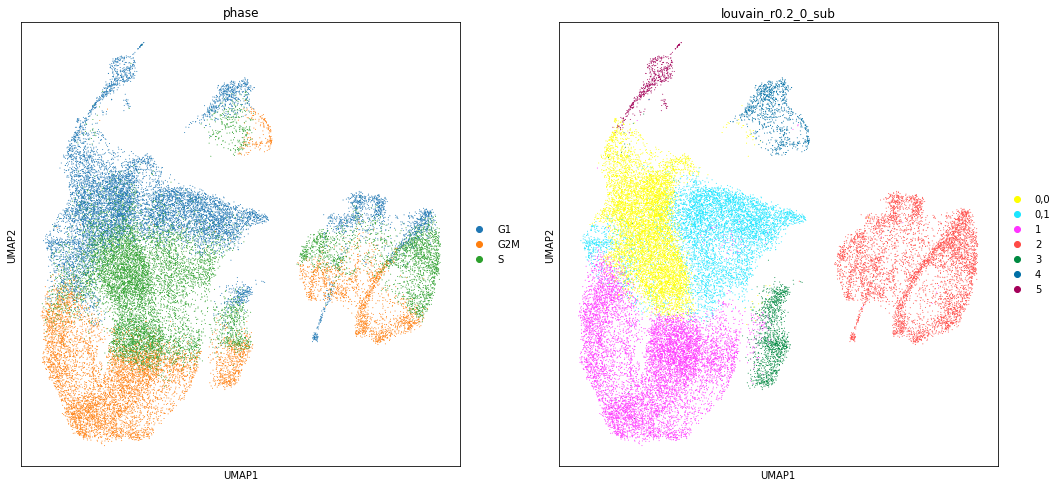

In [35]:
sc.pl.umap(adata, color=['phase', 'louvain_r0.2_0_sub'])

## Revised cluster assignment:

- 0: Neural stem cells (NSC)
- 1: Neural stem cells (NSC) - proliferating
- 2: Neural crest cells (NCSC)
- 3: Unknown (glial)
- 4: Glial precursors (myelinating)
- 5: Neural precursor cell / immature neuron

### Cluster 4

In [36]:
sc.tl.louvain(adata, restrict_to=('louvain_r0.2_0_sub', ['4']), resolution=0.2, key_added='louvain_r0.2_0_4_sub')

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.04) --> found 2 clusters and added
    'louvain_r0.2_0_4_sub', the cluster labels (adata.obs, categorical)


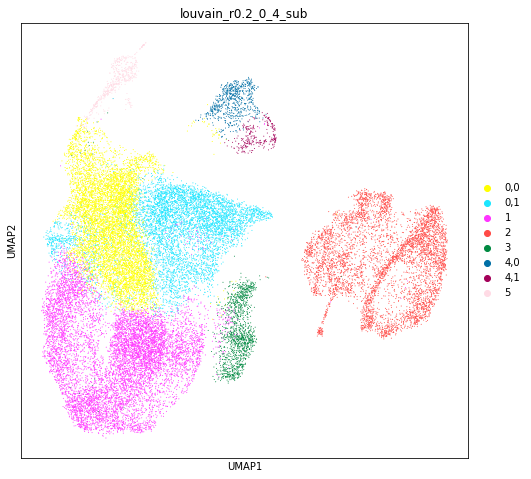

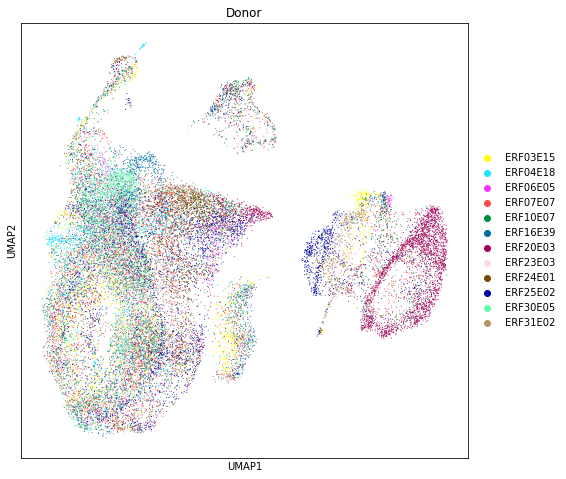

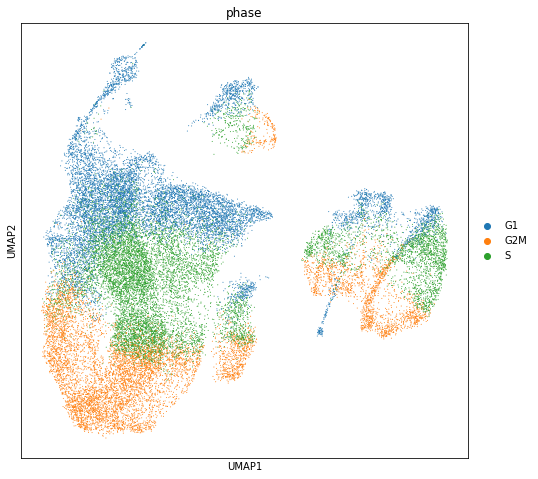

In [37]:
#Show the new clustering
sc.pl.umap(adata, color='louvain_r0.2_0_4_sub', palette=sc.pl.palettes.godsnot_64)
sc.pl.umap(adata, color='Donor', palette=sc.pl.palettes.godsnot_64)
sc.pl.umap(adata, color='phase')

In [38]:
#Get the new marker genes
sc.tl.rank_genes_groups(adata, groupby='louvain_r0.2_0_4_sub', key_added='rank_genes_r0.2_0_4_sub')

ranking genes
    finished (0:00:36.22) --> added to `.uns['rank_genes_r0.2_0_4_sub']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids


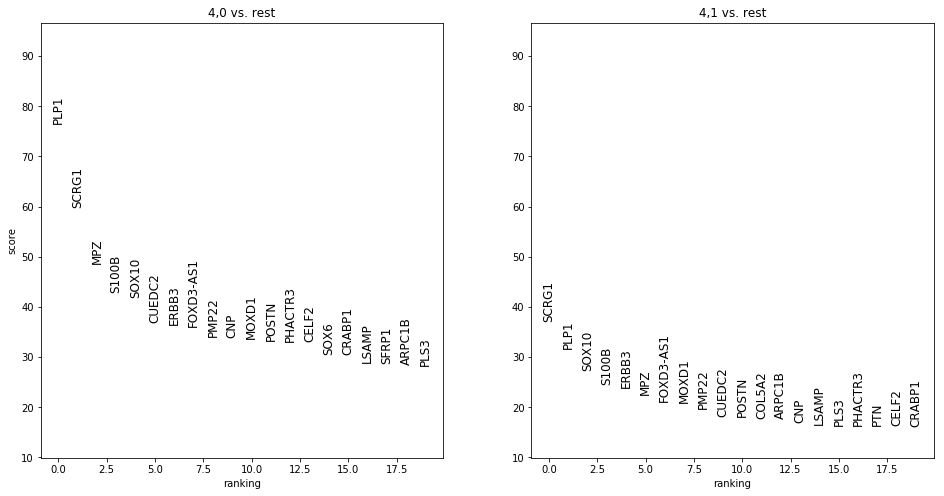

In [39]:
#Plot the new marker genes
sc.pl.rank_genes_groups(adata, key='rank_genes_r0.2_0_4_sub', groups=['4,0','4,1'], fontsize=12)

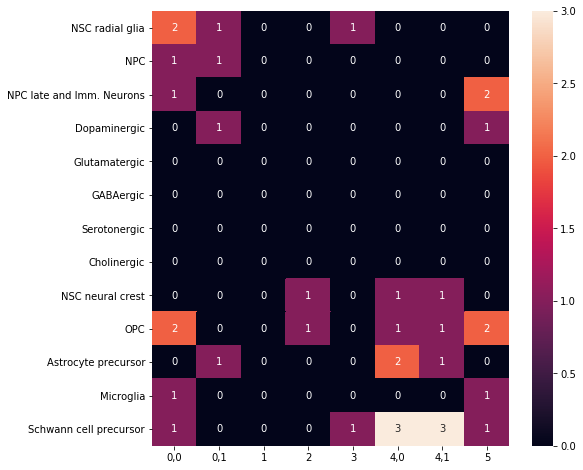

In [40]:
sb.heatmap(sc.tl.marker_gene_overlap(adata, marker_genes_2, key='rank_genes_r0.2_0_4_sub', normalize='None'), annot = True)

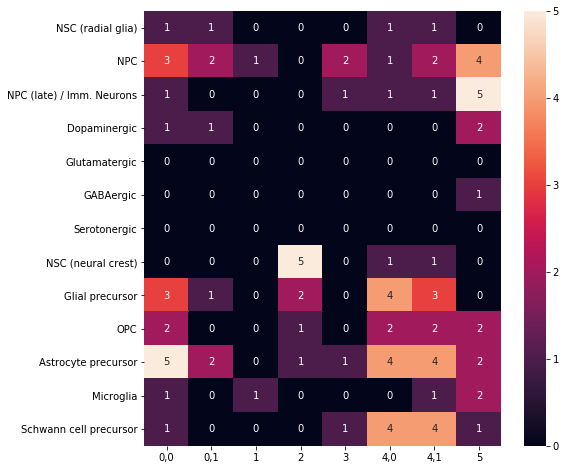

In [41]:
sb.heatmap(sc.tl.marker_gene_overlap(adata, marker_genes, key='rank_genes_r0.2_0_4_sub', normalize='None'), annot = True)

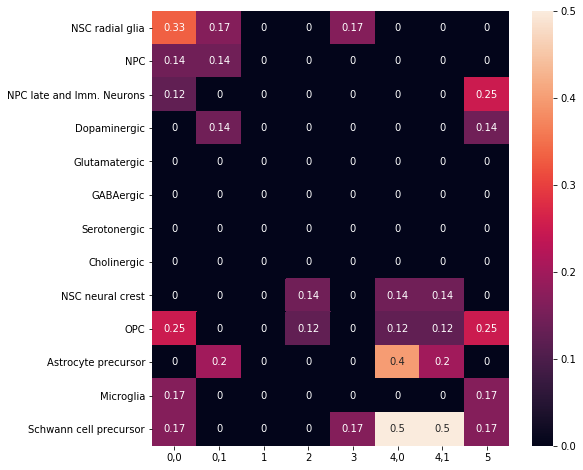

In [42]:
#Find marker overlap
sb.heatmap(sc.tl.marker_gene_overlap(adata, marker_genes_2, key='rank_genes_r0.2_0_4_sub', normalize='reference'), annot = True)

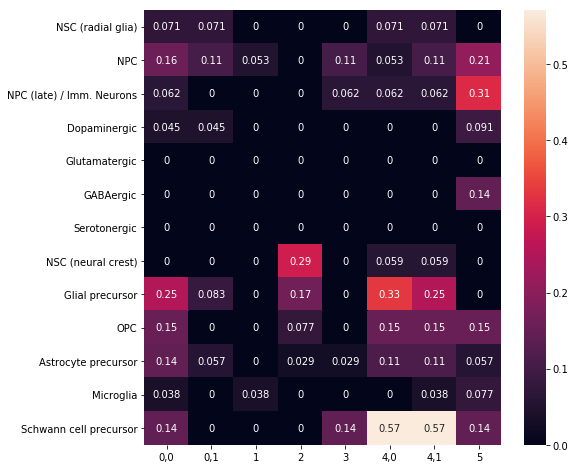

In [43]:
#Find marker overlap
sb.heatmap(sc.tl.marker_gene_overlap(adata, marker_genes, key='rank_genes_r0.2_0_4_sub', normalize='reference'), annot = True)

computing score 'score'
    finished (0:00:15.17) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.80) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:17.01) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.38) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.29) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.55) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.56) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.56) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.16) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.69) --> added
    'score', 

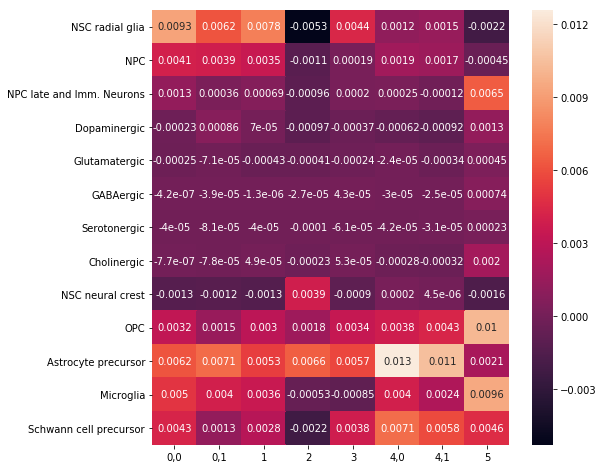

In [44]:
groups = adata.obs['louvain_r0.2_0_4_sub'].cat.categories
df = np.zeros((len(marker_genes_2), len(groups)))
i=-1
for marker in marker_genes_2:
    i+=1
    sc.tl.score_genes(adata, marker_genes_2[marker])
    j = 0
    for group in groups:
        df[i, j] = np.mean(adata.obs['score'][adata.obs['louvain_r0.2_0_4_sub'] == group])
        j += 1
cells = marker_genes_2.keys()
DF = pd.DataFrame(df, index = cells, columns = groups)
sb.heatmap(DF, annot = True)

computing score 'score'
    finished (0:00:17.65) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:17.02) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.92) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:17.01) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.47) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.08) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.85) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.86) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.65) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.33) --> added
    'score', 

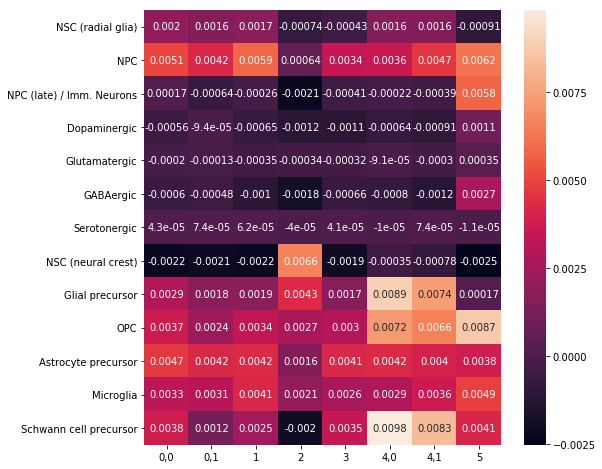

In [45]:
groups = adata.obs['louvain_r0.2_0_4_sub'].cat.categories
df = np.zeros((len(marker_genes), len(groups)))
i=-1
for marker in marker_genes:
    i+=1
    sc.tl.score_genes(adata, marker_genes[marker])
    j = 0
    for group in groups:
        df[i, j] = np.mean(adata.obs['score'][adata.obs['louvain_r0.2_0_4_sub'] == group])
        j += 1
cells = marker_genes.keys()
DF = pd.DataFrame(df, index = cells, columns = groups)
sb.heatmap(DF, annot = True)

In [46]:
#GO:BP enrichment of marker gene sets for further support of cluster annotation
pd.set_option("display.max_colwidth", 800)

for i in ['4,0', '4,1']:
    print(f"Cluster {i}:")
    clust_enrichment = gprofiler(adata.uns['rank_genes_r0.2_0_4_sub']['names'][i], custom_bg=adata.var_names.tolist(), organism='hsapiens', correction_method='fdr', src_filter=['GO:BP'])
    clust_enrichment = clust_enrichment.sort_values('p.value').iloc[:,[2,3,5,6,11]]
    clust_enrichment.iloc[:50,:]
    print("")

Cluster 4,0:


p.value  term.size  overlap.size  recall  \
term.id                                                 
GO:0022008  0.000001       1395            31   0.320   
GO:0048666  0.000002        960            25   0.258   
GO:0031175  0.000003        851            23   0.237   
GO:0051239  0.000004       2385            39   0.402   
GO:0007399  0.000004       2077            36   0.371   
GO:0048468  0.000004       1757            33   0.340   
GO:0048699  0.000004       1309            28   0.289   
GO:0030182  0.000007       1183            26   0.268   
GO:0009653  0.000009       2163            36   0.371   
GO:0051674  0.000009       1208            26   0.268   
GO:0048870  0.000009       1208            26   0.268   
GO:0040011  0.000010       1399            28   0.289   
GO:0048731  0.000010       3840            50   0.515   
GO:0050793  0.000010       2101            35   0.361   
GO:0048856  0.000011       4659            56   0.577   
GO:0016477  0.000017       1099            24   0.247   
GO:0001568  0.000018        559            17   0.175   
GO:0000902  0.000020        865            21   0.216   
GO:0061564  0.000020        433            15   0.155   
GO:0007275  0.000028       4285            52   0.536   
GO:0001944  0.000028        585            17   0.175   
GO:0050678  0.000028        273            12   0.124   
GO:0072359  0.000029        897            21   0.216   
GO:0032502  0.000029       4989            57   0.588   
GO:0072358  0.000029        594            17   0.175   
GO:0010001  0.000029        178            10   0.103   
GO:0042063  0.000045        237            11   0.113   
GO:0035239  0.000047        693            18   0.186   
GO:0001936  0.000047        106             8   0.082   
GO:0048514  0.000055        486            15   0.155   
GO:0032989  0.000056        950            21   0.216   
GO:0048869  0.000056       3381            44   0.454   
GO:0050680  0.000056        110             8   0.082   
GO:0006928  0.000078       1622            28   0.289   
GO:0050673  0.000084        315            12   0.124   
GO:2000026  0.000088       1636            28   0.289   
GO:0001935  0.000097        121             8   0.082   
GO:0033993  0.000097        744            18   0.186   
GO:0030154  0.000097       3219            42   0.433   
GO:0009605  0.000111       1667            28   0.289   
GO:0032501  0.000111       5529            59   0.608   
GO:0022603  0.000136        847            19   0.196   
GO:0035295  0.000145        852            19   0.196   
GO:0000904  0.000147        615            16   0.165   
GO:0051270  0.000154        775            18   0.186   
GO:0001937  0.000156         33             5   0.052   
GO:0120036  0.000163       1313            24   0.247   
GO:2000145  0.000172        704            17   0.175   
GO:0048812  0.000199        559            15   0.155   
GO:0009725  0.000207        797            18   0.186   

                                                                term.name  
term.id                                                                    
GO:0022008                                                   neurogenesis  
GO:0048666                                             neuron development  
GO:0031175                                  neuron projection development  
GO:0051239                 regulation of multicellular organismal process  
GO:0007399                                     nervous system development  
GO:0048468                                               cell development  
GO:0048699                                          generation of neurons  
GO:0030182                                         neuron differentiation  
GO:0009653                             anatomical structure morphogenesis  
GO:0051674                                           localization of cell  
GO:0048870                                                  cell motility  
GO:0040011                                                  


Cluster 4,1:


p.value  term.size  overlap.size  recall  \
term.id                                                     
GO:0051674  7.610000e-07       1208            29   0.296   
GO:0048870  7.610000e-07       1208            29   0.296   
GO:0000819  1.110000e-06        169            12   0.122   
GO:0016477  1.110000e-06       1099            27   0.276   
GO:0000280  1.190000e-06        361            16   0.163   
GO:0051301  1.420000e-06        547            19   0.194   
GO:0040011  1.470000e-06       1399            30   0.306   
GO:0050793  1.980000e-06       2101            37   0.378   
GO:0016043  1.980000e-06       5434            64   0.653   
GO:0006928  1.980000e-06       1622            32   0.327   
GO:0048285  2.620000e-06        404            16   0.163   
GO:0008283  2.620000e-06       1662            32   0.327   
GO:0022008  2.620000e-06       1395            29   0.296   
GO:0007275  2.620000e-06       4285            55   0.561   
GO:0048856  2.620000e-06       4659            58   0.592   
GO:0032502  3.020000e-06       4989            60   0.612   
GO:0071840  4.140000e-06       5606            64   0.653   
GO:0048869  5.650000e-06       3381            47   0.480   
GO:0048468  6.660000e-06       1757            32   0.327   
GO:0098813  6.660000e-06        232            12   0.122   
GO:0000070  6.660000e-06        145            10   0.102   
GO:0051239  6.730000e-06       2385            38   0.388   
GO:0048699  7.790000e-06       1309            27   0.276   
GO:0007059  8.250000e-06        290            13   0.133   
GO:0030154  8.850000e-06       3219            45   0.459   
GO:0048731  9.020000e-06       3840            50   0.510   
GO:0051128  1.080000e-05       2126            35   0.357   
GO:0140014  1.080000e-05        248            12   0.122   
GO:0001935  1.230000e-05        121             9   0.092   
GO:0032501  1.240000e-05       5529            62   0.633   
GO:0031175  1.320000e-05        851            21   0.214   
GO:0000902  1.630000e-05        865            21   0.214   
GO:0051983  1.640000e-05         92             8   0.082   
GO:0007399  1.640000e-05       2077            34   0.347   
GO:0009725  1.860000e-05        797            20   0.204   
GO:1903047  1.900000e-05        724            19   0.194   
GO:0048666  1.900000e-05        960            22   0.224   
GO:0000278  1.930000e-05        882            21   0.214   
GO:0030182  4.030000e-05       1183            24   0.245   
GO:0051241  4.030000e-05        924            21   0.214   
GO:0001936  4.150000e-05        106             8   0.082   
GO:0032989  5.870000e-05        950            21   0.214   
GO:0022402  6.050000e-05       1126            23   0.235   
GO:0051304  6.350000e-05         78             7   0.071   
GO:0061564  6.820000e-05        433            14   0.143   
GO:0007346  6.840000e-05        571            16   0.163   
GO:0030261  7.220000e-05         28             5   0.051   
GO:0010965  7.220000e-05         51             6   0.061   
GO:0051240  7.220000e-05       1328            25   0.255   
GO:0050673  7.250000e-05        315            12   0.122   

                                                               term.name  
term.id                                                                   
GO:0051674                                          localization of cell  
GO:0048870                                                 cell motility  
GO:0000819                                  sister chromatid segregation  
GO:0016477                                                cell migration  
GO:0000280                                              nuclear division  
GO:0051301                                                 cell division  
GO:0040011                                                    locomotion  
GO:0050793                           regulation of developmental process  
GO:0016043                               cellular component organization  
GO:0006928         

Notes:
- again cell cycle seems to separate these clusters

### Cluster 3

In [47]:
sc.tl.louvain(adata, restrict_to=('louvain_r0.2_0_sub', ['3']), resolution=0.2, key_added='louvain_r0.2_0_3_sub')

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.06) --> found 2 clusters and added
    'louvain_r0.2_0_3_sub', the cluster labels (adata.obs, categorical)


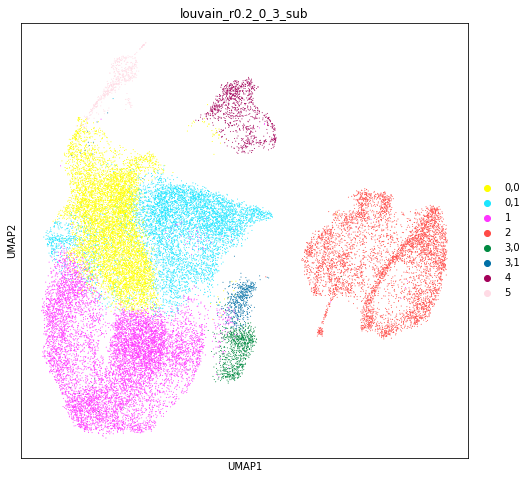

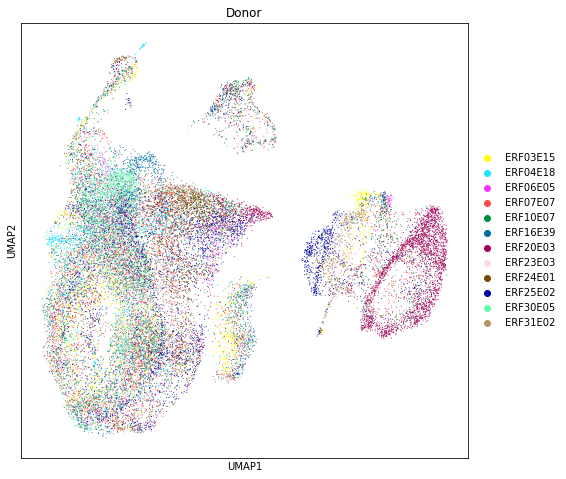

In [48]:
#Show the new clustering
sc.pl.umap(adata, color='louvain_r0.2_0_3_sub', palette=sc.pl.palettes.godsnot_64)
sc.pl.umap(adata, color='Donor', palette=sc.pl.palettes.godsnot_64)

In [49]:
#Get the new marker genes
sc.tl.rank_genes_groups(adata, groupby='louvain_r0.2_0_3_sub', key_added='rank_genes_r0.2_0_3_sub')

ranking genes
    finished (0:00:37.00) --> added to `.uns['rank_genes_r0.2_0_3_sub']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids


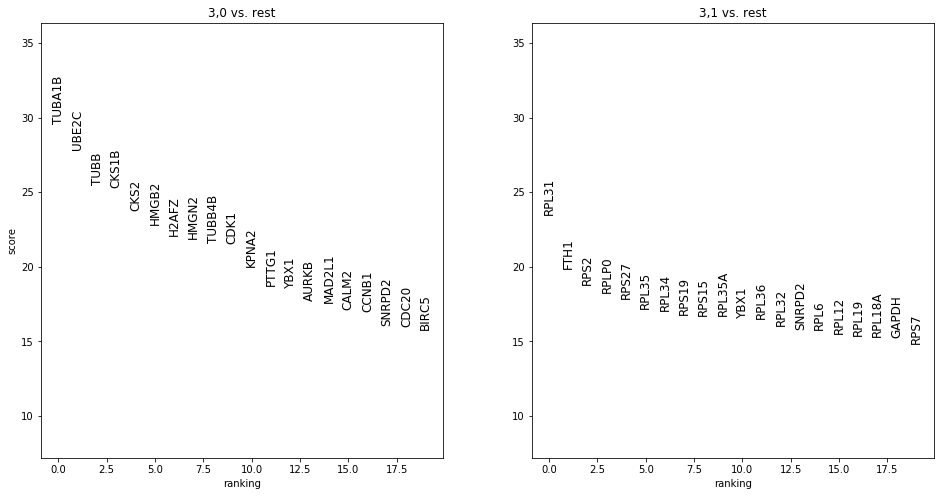

In [50]:
#Plot the new marker genes
sc.pl.rank_genes_groups(adata, key='rank_genes_r0.2_0_3_sub', groups=['3,0','3,1'], fontsize=12)

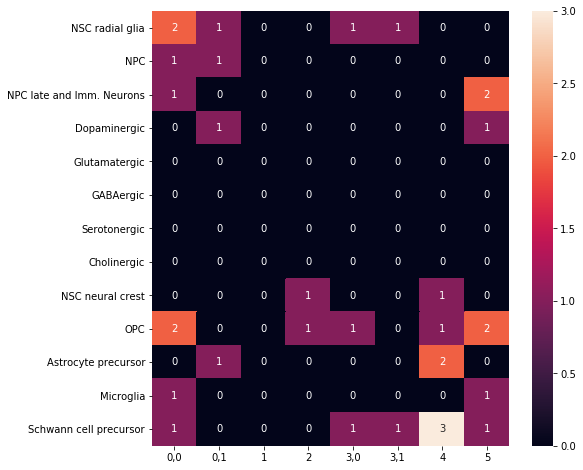

In [51]:
sb.heatmap(sc.tl.marker_gene_overlap(adata, marker_genes_2, key='rank_genes_r0.2_0_3_sub', normalize='None'), annot = True)

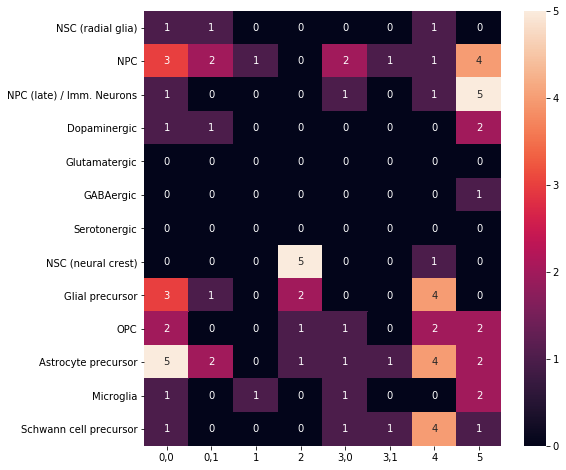

In [52]:
sb.heatmap(sc.tl.marker_gene_overlap(adata, marker_genes, key='rank_genes_r0.2_0_3_sub', normalize='None'), annot = True)

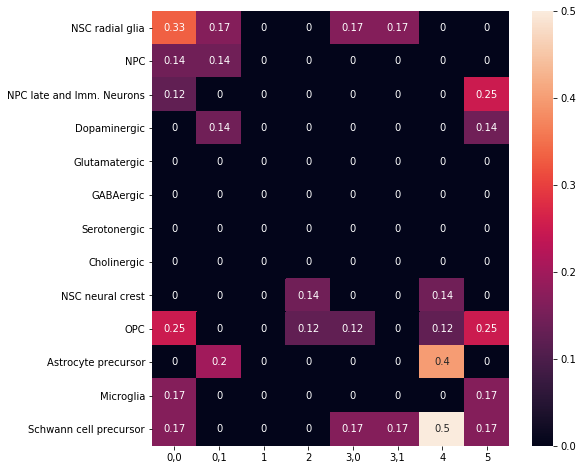

In [53]:
#Find marker overlap
sb.heatmap(sc.tl.marker_gene_overlap(adata, marker_genes_2, key='rank_genes_r0.2_0_3_sub', normalize='reference'), annot = True)

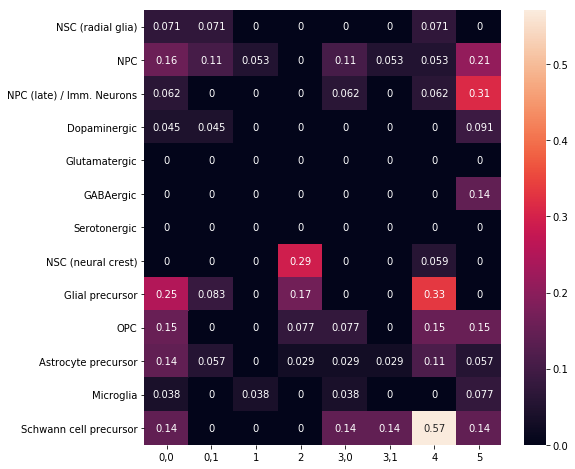

In [54]:
#Find marker overlap
sb.heatmap(sc.tl.marker_gene_overlap(adata, marker_genes, key='rank_genes_r0.2_0_3_sub', normalize='reference'), annot = True)

computing score 'score'
    finished (0:00:15.90) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.37) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.96) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.63) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.82) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.10) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.51) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.19) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.35) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.15) --> added
    'score', 

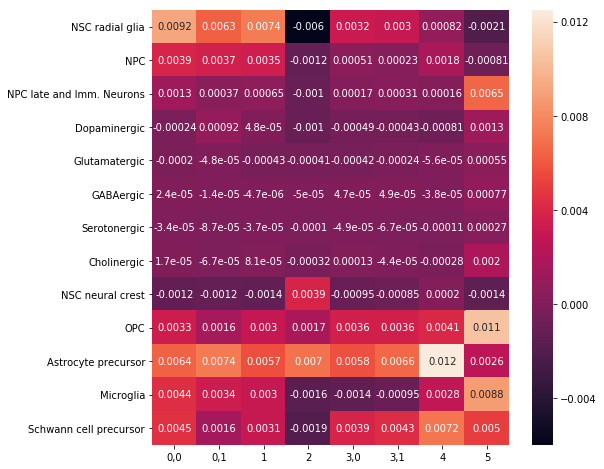

In [55]:
groups = adata.obs['louvain_r0.2_0_3_sub'].cat.categories
df = np.zeros((len(marker_genes_2), len(groups)))
i=-1
for marker in marker_genes_2:
    i+=1
    sc.tl.score_genes(adata, marker_genes_2[marker])
    j = 0
    for group in groups:
        df[i, j] = np.mean(adata.obs['score'][adata.obs['louvain_r0.2_0_3_sub'] == group])
        j += 1
cells = marker_genes_2.keys()
DF = pd.DataFrame(df, index = cells, columns = groups)
sb.heatmap(DF, annot = True)

computing score 'score'
    finished (0:00:16.61) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:17.24) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.71) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:17.06) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.29) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.22) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.55) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:16.31) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:17.32) --> added
    'score', score of gene set (adata.obs)
computing score 'score'
    finished (0:00:17.14) --> added
    'score', 

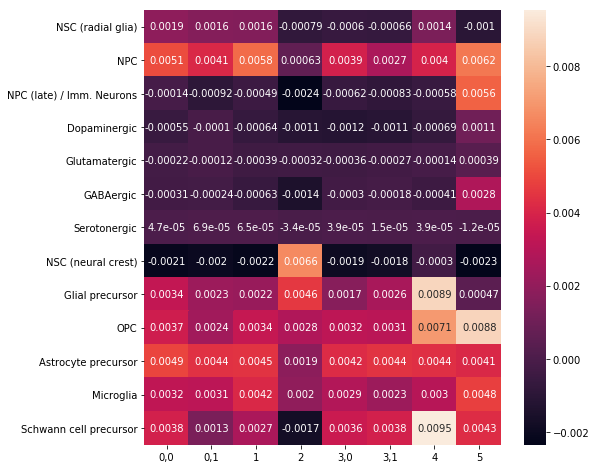

In [56]:
groups = adata.obs['louvain_r0.2_0_3_sub'].cat.categories
df = np.zeros((len(marker_genes), len(groups)))
i=-1
for marker in marker_genes:
    i+=1
    sc.tl.score_genes(adata, marker_genes[marker])
    j = 0
    for group in groups:
        df[i, j] = np.mean(adata.obs['score'][adata.obs['louvain_r0.2_0_3_sub'] == group])
        j += 1
cells = marker_genes.keys()
DF = pd.DataFrame(df, index = cells, columns = groups)
sb.heatmap(DF, annot = True)

In [57]:
#GO:BP enrichment of marker gene sets for further support of cluster annotation
pd.set_option("display.max_colwidth", 800)

for i in ['3,0', '3,1']:
    print(f"Cluster {i}:")
    clust_enrichment = gprofiler(adata.uns['rank_genes_r0.2_0_3_sub']['names'][i], custom_bg=adata.var_names.tolist(), organism='hsapiens', correction_method='fdr', src_filter=['GO:BP'])
    clust_enrichment = clust_enrichment.sort_values('p.value').iloc[:,[2,3,5,6,11]]
    clust_enrichment.iloc[:50,:]
    print("")

Cluster 3,0:


p.value  term.size  overlap.size  recall  \
term.id                                                     
GO:0051301  9.140000e-27        547            39    0.39   
GO:0000278  1.160000e-22        882            42    0.42   
GO:1903047  1.160000e-22        724            39    0.39   
GO:0007049  5.830000e-19       1608            49    0.49   
GO:0022402  5.480000e-18       1126            41    0.41   
GO:0031145  1.160000e-15         35            12    0.12   
GO:0007059  6.200000e-15        290            22    0.22   
GO:0000070  2.400000e-14        145            17    0.17   
GO:0140014  5.010000e-14        248            20    0.20   
GO:0006996  5.010000e-14       3398            61    0.61   
GO:0051726  6.730000e-14       1046            35    0.35   
GO:0051276  1.030000e-13       1063            35    0.35   
GO:0000819  2.130000e-13        169            17    0.17   
GO:0044770  3.620000e-13        503            25    0.25   
GO:0044772  7.590000e-13        470            24    0.24   
GO:0098813  2.090000e-12        232            18    0.18   
GO:0000280  3.020000e-12        361            21    0.21   
GO:0007017  3.890000e-12        681            27    0.27   
GO:0007346  4.350000e-12        571            25    0.25   
GO:1902850  7.950000e-12        122            14    0.14   
GO:0007051  9.790000e-12        153            15    0.15   
GO:0048285  2.140000e-11        404            21    0.21   
GO:0010564  2.860000e-11        626            25    0.25   
GO:0007010  2.710000e-10       1113            31    0.31   
GO:0007052  2.710000e-10        101            12    0.12   
GO:0071840  7.380000e-10       5606            71    0.71   
GO:0000226  2.340000e-09        469            20    0.20   
GO:0016043  7.640000e-09       5434            68    0.68   
GO:1901987  1.680000e-08        362            17    0.17   
GO:0051983  3.500000e-08         92            10    0.10   
GO:0045787  3.640000e-08        330            16    0.16   
GO:1901990  4.070000e-08        333            16    0.16   
GO:0051783  6.640000e-08        166            12    0.12   
GO:0006323  9.170000e-08        171            12    0.12   
GO:0010965  9.220000e-08         51             8    0.08   
GO:0044265  1.170000e-07       1024            26    0.26   
GO:0044085  1.230000e-07       2835            45    0.45   
GO:0051306  1.410000e-07         54             8    0.08   
GO:1905818  1.610000e-07         55             8    0.08   
GO:0007088  2.210000e-07        148            11    0.11   
GO:0071103  2.520000e-07        233            13    0.13   
GO:0000086  2.790000e-07        192            12    0.12   
GO:0034622  2.960000e-07       1001            25    0.25   
GO:0090068  2.960000e-07        237            13    0.13   
GO:0033047  3.080000e-07         61             8    0.08   
GO:0007093  3.250000e-07        156            11    0.11   
GO:0071824  3.650000e-07        243            13    0.13   
GO:0044839  5.730000e-07        208            12    0.12   
GO:0051641  6.780000e-07       2469            40    0.40   
GO:0009057  6.850000e-07       1219            27    0.27   

                                                                     term.name  
term.id                                                                         
GO:0051301                                                       cell division  
GO:0000278                                                  mitotic cell cycle  
GO:1903047                                          mitotic cell cycle process  
GO:0007049                                                          cell cycle  
GO:0022402                                                  cell cycle process  
GO:0031145              anaphase-promoting complex-dependent catabolic process  
GO:0007059                                              chromosome segregation  
GO:0000070                                mitotic sister chromatid segregation  
GO:0140014                        


Cluster 3,1:


p.value  term.size  overlap.size  recall  \
term.id                                                      
GO:0006614  2.180000e-147         92            71   0.724   
GO:0006613  3.840000e-144         98            71   0.724   
GO:0045047  1.040000e-142        101            71   0.724   
GO:0072599  8.020000e-141        105            71   0.724   
GO:0000184  1.560000e-134        120            71   0.724   
GO:0070972  4.260000e-133        124            71   0.724   
GO:0006612  5.060000e-122        161            71   0.724   
GO:0006413  4.660000e-116        188            71   0.724   
GO:0000956  9.750000e-114        200            71   0.724   
GO:0090150  6.860000e-105        272            72   0.735   
GO:0006402  9.600000e-103        289            72   0.735   
GO:0006401   3.640000e-99        320            72   0.735   
GO:0006605   3.260000e-91        379            71   0.724   
GO:0034655   2.750000e-86        495            73   0.745   
GO:0046700   2.950000e-84        526            73   0.745   
GO:0044270   4.370000e-84        529            73   0.745   
GO:0006412   5.170000e-84        595            75   0.765   
GO:0019439   1.970000e-83        540            73   0.745   
GO:0072657   4.370000e-83        515            72   0.735   
GO:0043043   5.460000e-83        614            75   0.765   
GO:1901361   2.890000e-82        560            73   0.745   
GO:0072594   5.690000e-82        503            71   0.724   
GO:0006518   4.610000e-79        729            76   0.776   
GO:0043604   3.100000e-77        729            75   0.765   
GO:0016071   2.910000e-73        737            73   0.745   
GO:0043603   3.170000e-70        947            76   0.776   
GO:0033365   7.230000e-69        800            72   0.735   
GO:0044265   1.240000e-62       1024            73   0.745   
GO:0006886   1.790000e-62        929            71   0.724   
GO:1901566   1.750000e-58       1623            80   0.816   
GO:0009057   4.090000e-57       1219            73   0.745   
GO:0010629   1.980000e-55       1550            77   0.786   
GO:0046907   1.210000e-53       1564            76   0.776   
GO:0034613   2.350000e-50       1583            74   0.755   
GO:0070727   3.470000e-50       1592            74   0.755   
GO:0015031   6.030000e-50       1678            75   0.765   
GO:0015833   1.760000e-49       1703            75   0.765   
GO:0042886   3.430000e-49       1719            75   0.765   
GO:0045184   4.380000e-48       1780            75   0.765   
GO:1901575   4.480000e-48       1781            75   0.765   
GO:0051649   5.130000e-48       1864            76   0.776   
GO:0044248   5.010000e-47       1923            76   0.776   
GO:0051641   1.230000e-45       2469            81   0.827   
GO:0071705   2.650000e-45       1946            75   0.765   
GO:0002181   3.940000e-45         90            31   0.316   
GO:0010605   2.200000e-44       2270            78   0.796   
GO:0009056   1.190000e-43       2139            76   0.776   
GO:0009892   5.840000e-42       2445            78   0.796   
GO:0008104   1.090000e-40       2348            76   0.776   
GO:0071702   1.300000e-40       2261            75   0.765   

                                                                                term.name  
term.id                                                                                    
GO:0006614                    SRP-dependent cotranslational protein targeting to membrane  
GO:0006613                                  cotranslational protein targeting to membrane  
GO:0045047                                                        protein targeting to ER  
GO:0072599                 establishment of protein localization to endoplasmic reticulum  
GO:0000184            nuclear-transcribed mRNA catabolic process, nonsense-mediated decay  
GO:0070972                                  protein localization to endoplasmic reticulum  
GO:0006612                                               

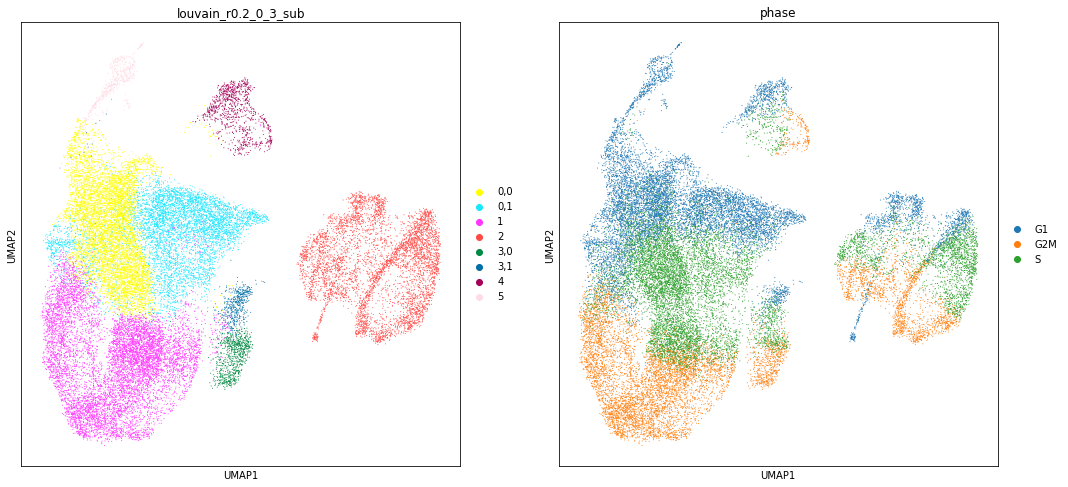

In [58]:
sc.pl.umap(adata, color=['louvain_r0.2_0_3_sub', 'phase'])

Notes:
- subcluster 3 is a cell cycle effect. 3,0 is more prolifterative (G2M-phase) and 3,1 is S and G1 phase.

# Rename categories

In [92]:
adata.rename_categories('louvain_r0.2', ['NSC', 'NSC (G2M-phase)', 'NCSC', 'late NPC', 'Glial precursors (myelinating)', 'immature neurons'])

In [93]:
adata.rename_categories('louvain_r0.2_0_sub', ['NSC (Wnt)', 'NSC (Shh)', 'NSC (G2M-phase)', 'NCSC', 'late NPC', 'Glial precursors (myelinating)', 'immature neurons'])

In [94]:
adata.rename_categories('louvain_r0.2_0_4_sub', ['NSC (Wnt)', 'NSC (Shh)', 'NSC (G2M-phase)', 'NCSC', 'late NPC', 'Glial precursors (myelinating),0', 'Glial precursors (myelinating),1', 'immature neurons'])

# Trajectories within NPCs

In [153]:
#Subset to NPCs
adata_npc = adata[[g in ['NSC', 'NSC (G2M-phase)', 'immature neurons', 'late NPC'] for g in adata.obs['louvain_r0.2']],:].copy()
#adata_npc = adata[[g in ['NSC', 'NSC (G2M-phase)', 'immature neurons'] for g in adata.obs['louvain_r0.2']],:].copy()
adata_npc.obs['louvain_r0.2'].value_counts()

NSC                 13545
NSC (G2M-phase)      9024
late NPC             1294
immature neurons      527
Name: louvain_r0.2, dtype: int64

In [154]:
sc.pp.pca(adata_npc, n_comps=50, svd_solver='arpack')
sc.pp.neighbors(adata_npc)
sc.tl.diffmap(adata_npc)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:07.44) --> added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix
computing Diffusion Maps using n_comps=15(=n_dcs)
    eigenvalues of transition matrix
    [1.         0.9946694  0.99005777 0.9804341  0.97572875 0.97120106
     0.965309   0.96353894 0.95991826 0.95971507 0.958205   0.952294
     0.94791085 0.94231987 0.94072694]
    finished (0:00:00.59) --> added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns)


In [173]:
adata.var_names[[g.startswith('PTCH') for g in adata.var_names]]

Index(['PTCH2', 'PTCHD4', 'PTCHD1', 'PTCH1'], dtype='object', name='index')

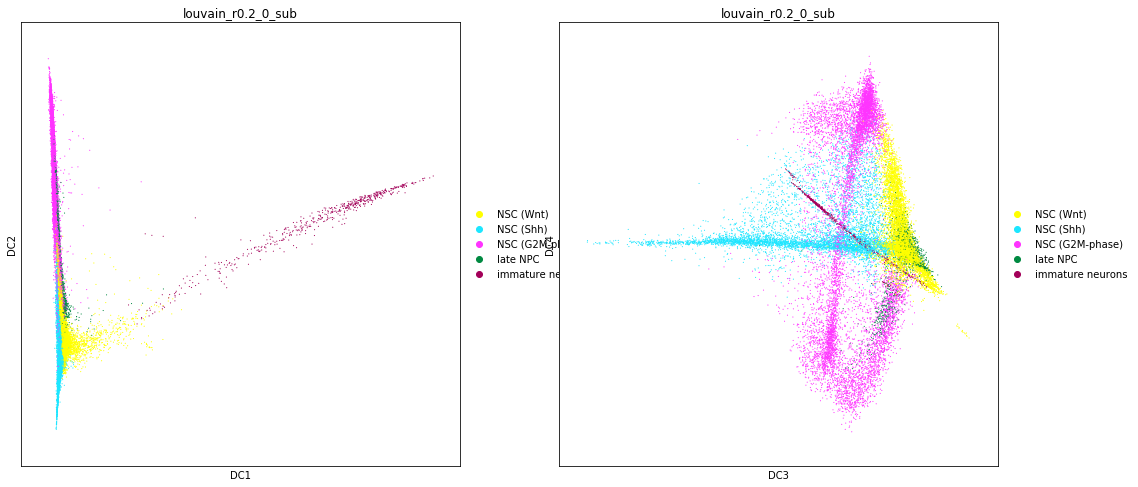

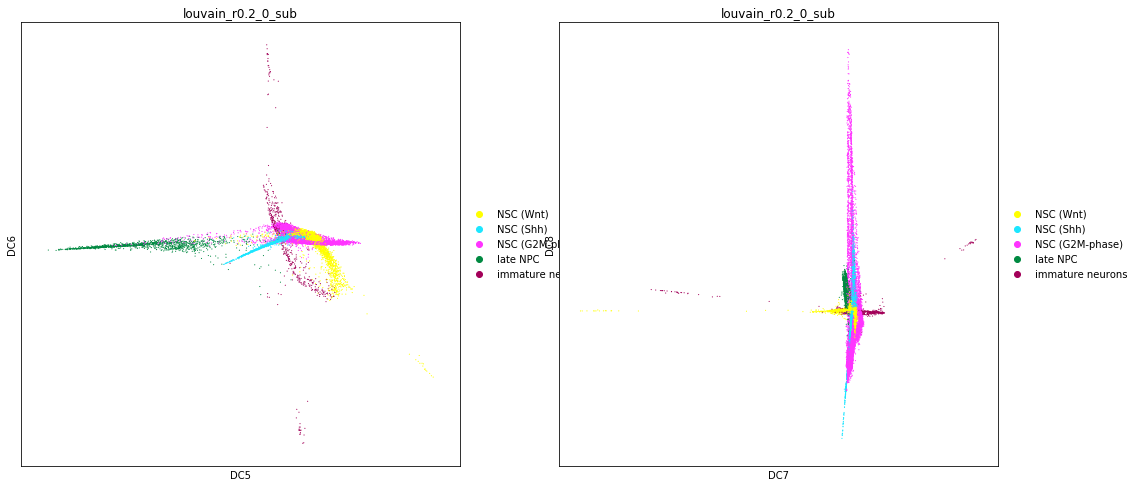

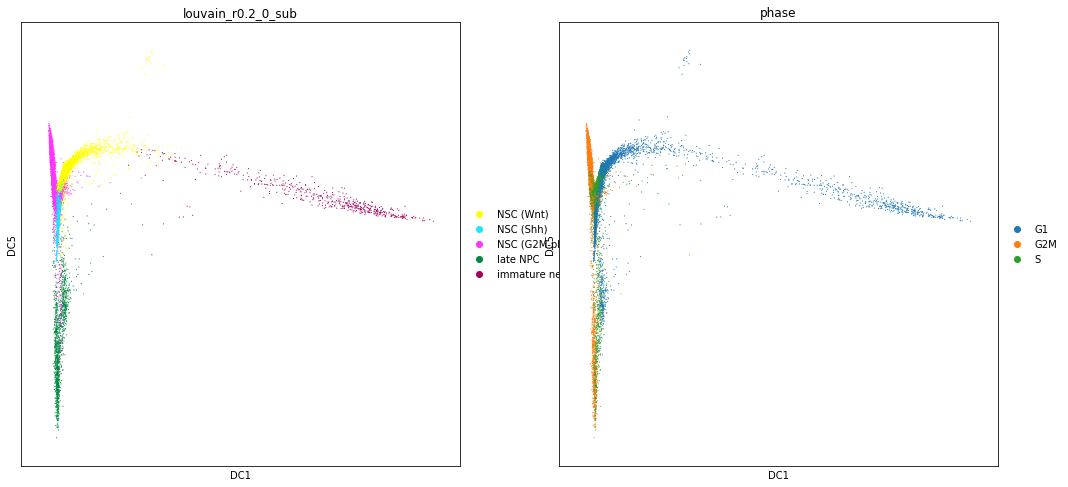

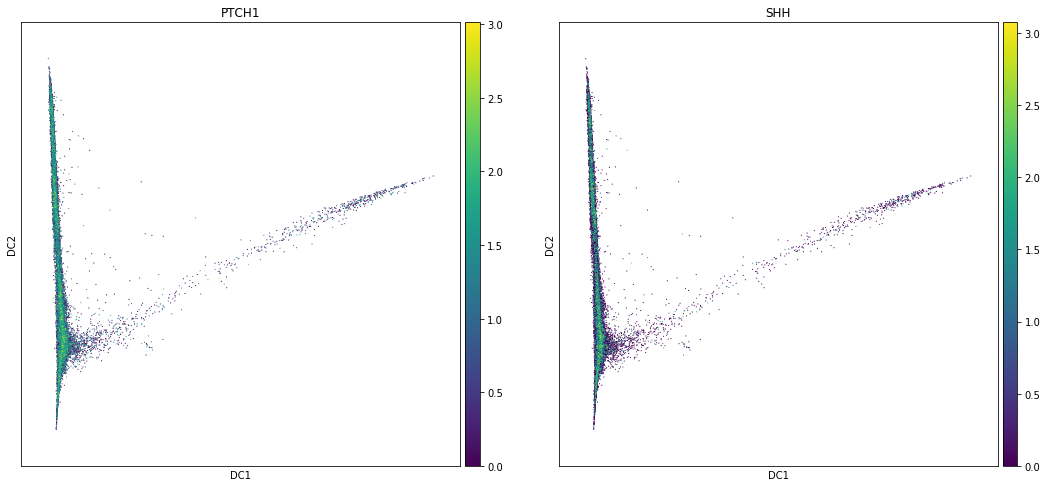

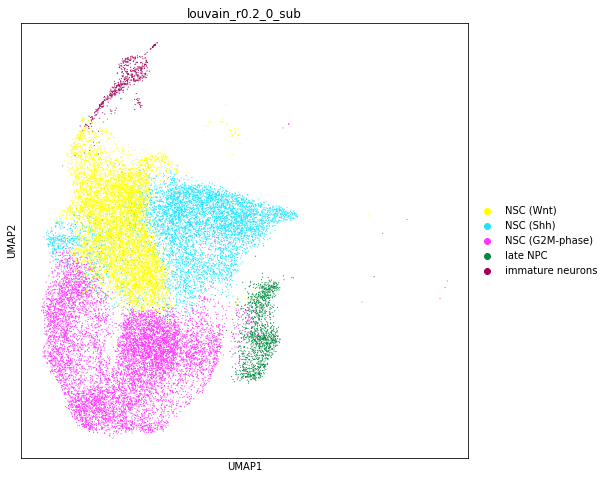

In [171]:
sc.pl.diffmap(adata_npc, components=['1,2', '3,4'], color='louvain_r0.2_0_sub')
sc.pl.diffmap(adata_npc, components=['5,6','7,8'], color='louvain_r0.2_0_sub')
sc.pl.diffmap(adata_npc, components=['1,5'], color=['louvain_r0.2_0_sub', 'phase'])
sc.pl.diffmap(adata_npc, components=['1,2'], color=['PTCH1', 'SHH'])
sc.pl.umap(adata_npc, color='louvain_r0.2_0_sub')

In [101]:
#Use '1' cell with maximum DC2
npc_early_mask = np.isin(adata_npc.obs['louvain_r0.2_0_sub'], 'NSC (G2M-phase)')
max_npc_id = np.argmax(adata_npc.obsm['X_diffmap'][npc_early_mask,2])
root_id = np.arange(len(npc_early_mask))[npc_early_mask][max_npc_id]

adata_npc.uns['iroot'] = root_id
print('The root id is {}'.format(root_id))

#Compute dpt
sc.tl.dpt(adata_npc)

The root id is 10787
computing Diffusion Pseudotime using n_dcs=10
    finished (0:00:00.00) --> added
    'dpt_pseudotime', the pseudotime (adata.obs)


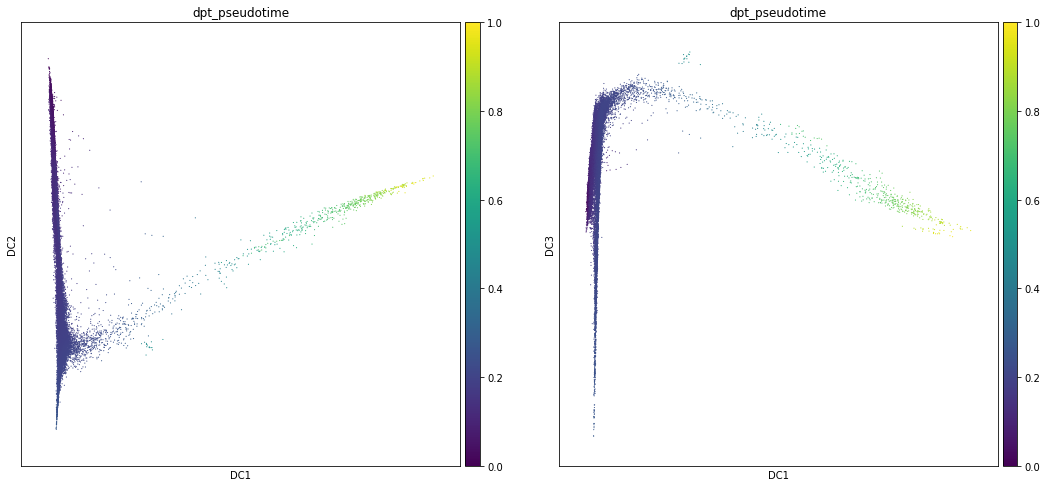

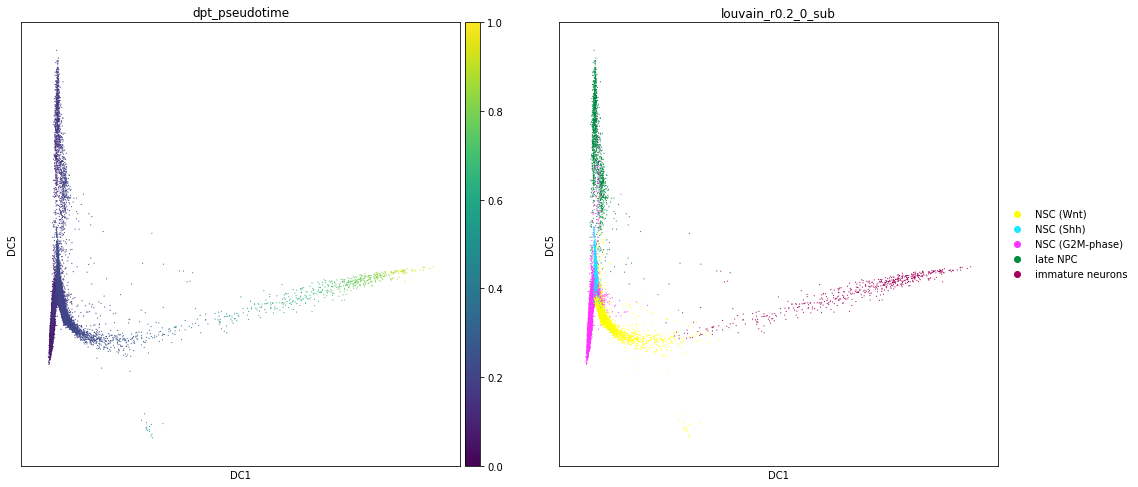

In [105]:
#Visualize pseudotime over differentiation
sc.pl.diffmap(adata_npc, components=['1,2','1,3'], color='dpt_pseudotime')
sc.pl.diffmap(adata_npc, components=['1,5'], color=['dpt_pseudotime', 'louvain_r0.2_0_sub'])

In [113]:
#Move pseudotime back to main adata object
new_obs = adata.obs.merge(adata_npc.obs['dpt_pseudotime'], how='left', left_index=True, right_index=True)

In [114]:
new_obs

Demux_state     Donor Lane donor  log_counts   mt_frac  \
index                                                                        
AAACCTGTCTTGTACT-0          SNG  ERF03E15    1     0    9.927057  0.043805   
AAACGGGTCGTTACAG-0          SNG  ERF03E15    1     0    9.636784  0.032380   
AAAGATGCAAGCCCAC-0          SNG  ERF03E15    1     0    8.214194  0.000542   
AAAGATGCAATCGGTT-0          SNG  ERF03E15    1     0    9.996112  0.038284   
AAAGCAAAGAGTCGGT-0          SNG  ERF03E15    1     0    9.407715  0.018059   
AAAGTAGGTTAAAGTG-0          SNG  ERF03E15    1     0    9.590625  0.044780   
AAATGCCAGGATTCGG-0          SNG  ERF03E15    1     0    9.362803  0.037606   
AAATGCCTCGTGGTCG-0          SNG  ERF03E15    1     0    9.884865  0.024655   
AAATGCCTCTGTGCAA-0          SNG  ERF03E15    1     0    8.295049  0.000250   
AACCGCGAGGTTACCT-0          SNG  ERF03E15    1     0    9.052048  0.001289   
AACCGCGAGTCATCCA-0          SNG  ERF03E15    1     0   10.207621  0.025305   
AACGTTGCACCCATTC-0          SNG  ERF03E15    1     0    9.752665  0.063023   
AACGTTGGTTACGTCA-0          SNG  ERF03E15    1     0   10.217495  0.049310   
AACGTTGGTTGACGTT-0          SNG  ERF03E15    1     0    9.854927  0.014487   
AACTCTTCAATCCGAT-0          SNG  ERF03E15    1     0    9.994835  0.032948   
AACTTTCGTTCGTCTC-0          SNG  ERF03E15    1     0    8.383204  0.001372   
AAGACCTGTTCCACGG-0          SNG  ERF03E15    1     0    9.910959  0.022481   
AAGGAGCAGTATCGAA-0          SNG  ERF03E15    1     0    8.826294  0.000294   
AAGGAGCGTAACGTTC-0          SNG  ERF03E15    1     0   10.365932  0.020183   
AAGGCAGGTACAGTTC-0          SNG  ERF03E15    1     0    9.984145  0.028044   
AAGGTTCGTTATCCGA-0          SNG  ERF03E15    1     0   10.345124  0.022794   
AAGTCTGAGCTGAACG-0          SNG  ERF03E15    1     0    9.892174  0.019267   
AATCGGTAGCCCTAAT-0          SNG  ERF03E15    1     0    9.957455  0.004974   
ACACCAAGTCTTTCAT-0          SNG  ERF03E15    1     0    9.831615  0.039327   
ACAGCTATCTGGTGTA-0          SNG  ERF03E15    1     0    9.615206  0.030952   
ACCTTTAAGTCGCCGT-0          SNG  ERF03E15    1     0    8.795431  0.000303   
ACCTTTATCTGCAAGT-0          SNG  ERF03E15    1     0    9.490771  0.008839   
ACGAGCCCAAGGTTTC-0          SNG  ERF03E15    1     0    9.746716  0.036379   
ACGAGCCGTATTCTCT-0          SNG  ERF03E15    1     0   10.265244  0.027963   
ACGAGGAGTAGCTTGT-0          SNG  ERF03E15    1     0    9.179984  0.084630   
...                         ...       ...  ...   ...         ...       ...   
GTGCAGCAGACACTAA-11         SNG  ERF31E02    6    11    8.512382  0.001005   
GTGCTTCTCTCTTGAT-11         SNG  ERF31E02    6    11    8.367764  0.000232   
GTTCTCGCATCCGCGA-11         SNG  ERF31E02    6    11    8.741456  0.037078   
TACGGGCTCTTCCTTC-11         SNG  ERF31E02    6    11    9.533510  0.014187   
TACTTACAGAATTGTG-11         SNG  ERF31E02    6    11    9.021840  0.000241   
TATCTCATCGGTCTAA-11         SNG  ERF31E02    6    11    9.258655  0.068699   
TATGCCCTCCGATATG-11         SNG  ERF31E02    6    11    9.148465  0.014362   
TCAACGACAATGGAGC-11         SNG  ERF31E02    6    11    9.172535  0.017032   
TCACAAGAGTCCATAC-11         SNG  ERF31E02    6    11    8.151334  0.000288   
TCAGCTCAGCGATATA-11         SNG  ERF31E02    6    11    8.962008  0.016665   
TCAGGTATCCAAAGTC-11         SNG  ERF31E02    6    11    9.111956  0.012799   
TCATTACGTCAACTGT-11         SNG  ERF31E02    6    11    9.240481  0.027169   
TCCACACTCACCCTCA-11         SNG  ERF31E02    6    11    9.665547  0.053663   
TCGCGAGTCAACGGGA-11         SNG  ERF31E02    6    11    8.121183  0.031204   
TCTCTAATCACGCATA-11         SNG  ERF31E02    6    11    9.638610  0.020266   
TCTTCGGAGGAGTTTA-11         SNG  ERF31E02    6    11    9.689489  0.009847   
TGAAAGAAGATCACGG-11         SNG  ERF31E02    6    11    8.061802  0.000315   
TGAGCCGCATGTAAGA-11         SNG  ERF31E02    6    11    9.046880  0.024140   
TGCCAAACAAGTTGTC-11         SNG  ERF31E02 

In [115]:
#If new_obs looks good, use this
adata.obs = new_obs

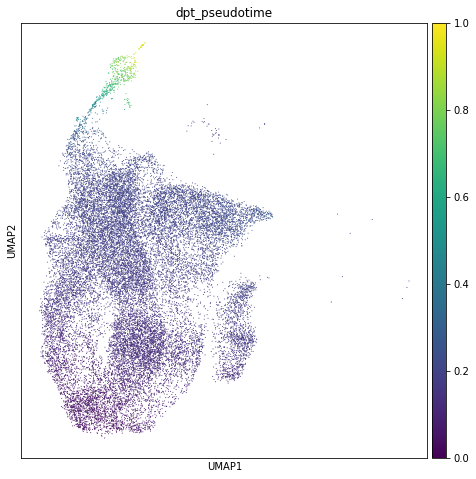

In [116]:
sc.pl.umap(adata, color='dpt_pseudotime')

In [117]:
adata.obs.groupby('louvain_r0.2_0_sub').mean()['dpt_pseudotime']

louvain_r0.2_0_sub
NSC (Wnt)                         0.190902
NSC (Shh)                         0.198875
NSC (G2M-phase)                   0.111107
NCSC                                   NaN
late NPC                          0.165260
Glial precursors (myelinating)         NaN
immature neurons                  0.692421
Name: dpt_pseudotime, dtype: float32

In [118]:
adata.obs.groupby('louvain_r0.2').mean()['dpt_pseudotime']

louvain_r0.2
NSC                               0.194384
NSC (G2M-phase)                   0.111107
NCSC                                   NaN
late NPC                          0.165260
Glial precursors (myelinating)         NaN
immature neurons                  0.692421
Name: dpt_pseudotime, dtype: float32

Results:
- DPT doesn't give a hierarchy of development in the NPC clusters. It rather separates `NPCs` from the rest, but does not give further substructure.

Note:
- trajectories should probably have CC removed.

# Summary plots

saving figure to file ./figures/umap_clustering_hvg_fine.pdf


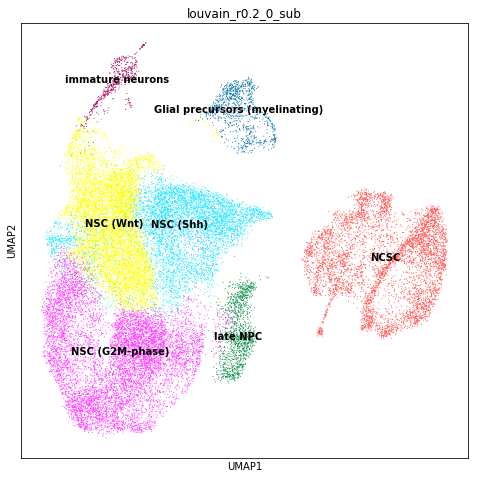

In [119]:
sc.pl.umap(adata, color='louvain_r0.2_0_sub', palette=sc.pl.palettes.godsnot_64, legend_loc='on data', save='_clustering_hvg_fine')


saving figure to file ./figures/umap_Donor_dist_hvg.pdf


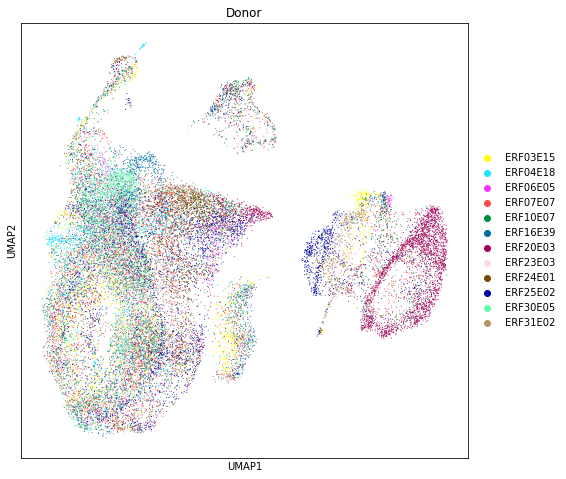

saving figure to file ./figures/umap_condition_dist_hvg.pdf


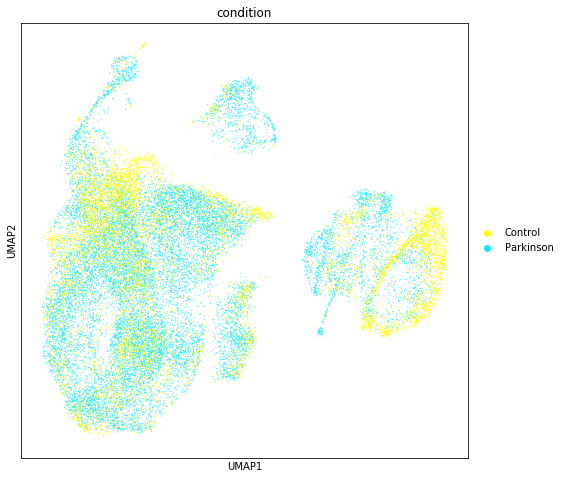

In [120]:
sc.pl.umap(adata, color='Donor', palette=sc.pl.palettes.godsnot_64, save='_Donor_dist_hvg')
sc.pl.umap(adata, color='condition', palette=sc.pl.palettes.godsnot_64, save='_condition_dist_hvg')

# Summary statistics

In [121]:
# CC phase per cluster
adata.obs.groupby(['louvain_r0.2_0_sub'])['phase'].value_counts()
adata.obs.groupby(['louvain_r0.2_0_4_sub'])['phase'].value_counts()

louvain_r0.2_0_sub              phase
NSC (Wnt)                       G1       4100
                                S        3523
                                G2M         7
NSC (Shh)                       G1       3910
                                S        1994
                                G2M        11
NSC (G2M-phase)                 G2M      6025
                                S        2527
                                G1        472
NCSC                            S        2225
                                G2M      1730
                                G1       1249
late NPC                        G2M       574
                                S         473
                                G1        247
Glial precursors (myelinating)  G1        508
                                S         264
                                G2M       191
immature neurons                G1        518
                                S           8
                                G2M       

louvain_r0.2_0_4_sub              phase
NSC (Wnt)                         G1       4100
                                  S        3523
                                  G2M         7
NSC (Shh)                         G1       3910
                                  S        1994
                                  G2M        11
NSC (G2M-phase)                   G2M      6025
                                  S        2527
                                  G1        472
NCSC                              S        2225
                                  G2M      1730
                                  G1       1249
late NPC                          G2M       574
                                  S         473
                                  G1        247
Glial precursors (myelinating),0  G1        508
                                  S         162
                                  G2M        32
Glial precursors (myelinating),1  G2M       159
                                  S         102


Notes:
- Cell cycle can be seen to separate NSC (G2M-phase) from the other two subclusters (G1 & S vs G2M & some S)
- CC also separates Cluster 3 subclusters (G1 & S vs G2M & some S)
- immature neurons are mainly in G1 phase

In [122]:
adata.obs.groupby(['louvain_r0.2_0_sub', 'condition'])['phase'].value_counts()

louvain_r0.2_0_sub              condition  phase
NSC (Wnt)                       Control    G1       2278
                                           S        1274
                                           G2M         2
                                Parkinson  S        2249
                                           G1       1822
                                           G2M         5
NSC (Shh)                       Control    G1       1528
                                           S         512
                                           G2M         3
                                Parkinson  G1       2382
                                           S        1482
                                           G2M         8
NSC (G2M-phase)                 Control    G2M      1659
                                           S         733
                                           G1        162
                                Parkinson  G2M      4366
                                       

Notes:
- no distinct separation of cell cycle over condition in any cluster

In [12]:
adata.obs['louvain_r0.2_0_sub'].value_counts(normalize=True)

NSC (G2M-phase)                   0.295317
NSC (Wnt)                         0.249697
NSC (Shh)                         0.193573
NCSC                              0.170305
late NPC                          0.042347
Glial precursors (myelinating)    0.031515
immature neurons                  0.017246
Name: louvain_r0.2_0_sub, dtype: float64

Notes:
- ERF20E03 has quite a different distribution of cell identities than other Donors (dominated by NCSC, rather than an NSC cluster)

In [15]:
adata.obs.groupby(['louvain_r0.2_0_sub'])['condition'].value_counts()
adata.obs.groupby(['louvain_r0.2_0_sub'])['condition'].value_counts(normalize=True)
adata.obs['condition'].value_counts(normalize=True)

louvain_r0.2_0_sub              condition
NSC (Wnt)                       Parkinson    4076
                                Control      3554
NSC (Shh)                       Parkinson    3872
                                Control      2043
NSC (G2M-phase)                 Parkinson    6470
                                Control      2554
NCSC                            Control      2859
                                Parkinson    2345
late NPC                        Parkinson     891
                                Control       403
Glial precursors (myelinating)  Parkinson     814
                                Control       149
immature neurons                Parkinson     419
                                Control       108
Name: condition, dtype: int64

louvain_r0.2_0_sub              condition
NSC (Wnt)                       Parkinson    0.534207
                                Control      0.465793
NSC (Shh)                       Parkinson    0.654607
                                Control      0.345393
NSC (G2M-phase)                 Parkinson    0.716977
                                Control      0.283023
NCSC                            Control      0.549385
                                Parkinson    0.450615
late NPC                        Parkinson    0.688563
                                Control      0.311437
Glial precursors (myelinating)  Parkinson    0.845275
                                Control      0.154725
immature neurons                Parkinson    0.795066
                                Control      0.204934
Name: condition, dtype: float64

Parkinson    0.618091
Control      0.381909
Name: condition, dtype: float64

Notes:
- all conditions have at least 100 control cells. Means probably robust at this level.
- Parkinson condition appears to have higher proportion in "immature neurons", in "glial precursors (myelinating)", and in "NSC (G2M-phase)" than expected.

# Save data

In [ ]:
adata.write(adata_full)